In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.RBOB)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,XB,-60881.0,128882.0,189763.0,36136.0,80365.0,44229.0,-3291.0,285.0,...,39197.0,-192059.0,-147137.0,100858.0,-18.62,3.5,-18.76,2.69,-18.46,2.1
808,2025-07-01,XB,-59728.0,120966.0,180694.0,30518.0,78539.0,48021.0,1153.0,-3291.0,...,-192059.0,NaN,100858.0,NaN,3.50,NaN,2.69,NaN,2.10,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean    -103381.037083
std       24043.598793
min     -174838.000000
25%     -118477.000000
50%     -103276.000000
75%      -86819.000000
max      -29531.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       809.000000
mean      62526.234858
std       19039.286552
min       11588.000000
25%       49026.000000
50%       61496.000000
75%       74912.000000
max      129000.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['Commercial_NetPosition_to_openinterest_change',
                         'CommercialLongPosition_to_openinterest_change',
                         'CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("rbob_cot_comm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'Commercial_NetPosition_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_report_Commercial_NetPosition_change',
  'F1_RolledPrice_change'],
 'CommercialLongPosition_change': ['F2_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change',
  'prior_5D_AGG_OI_change'],
 'CommercialShortPosition_change': ['prior_report_Commercial_NetPosition_change',
  'F3_RolledPrice_change',
  'prior_5D_AGG_OI_change'],
 'Commercial_NetPosition_to_openinterest_change': ['prior_report_Commercial_NetPosition_change',
  'F1_RolledPrice_change',
  'prior_5D_AGG_OI_change'],
 'CommercialLongPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change',
  'prior_5D_AGG_OI_change'],
 'CommercialShortPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'F1_RolledPrice_change']}

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-21 12:05:47,151] A new study created in memory with name: no-name-0a35cd7e-f58c-4656-866f-c4e20649d4a1
Best trial: 0. Best value: 0.382807:   1%|       | 1/80 [00:01<01:46,  1.35s/it]

[I 2025-08-21 12:05:48,505] Trial 0 finished with value: 0.38280662144604594 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.38280662144604594.
[I 2025-08-21 12:05:48,540] Trial 1 finished with value: 0.3827998480780013 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.38280662144604594.


Best trial: 2. Best value: 0.470942:   4%|▎      | 3/80 [00:04<02:00,  1.56s/it]

[I 2025-08-21 12:05:51,789] Trial 2 finished with value: 0.4709419067258879 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4709419067258879.


Best trial: 2. Best value: 0.470942:   9%|▌      | 7/80 [00:05<00:34,  2.15it/s]

[I 2025-08-21 12:05:52,031] Trial 3 finished with value: 0.46486815605855447 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.4709419067258879.
[I 2025-08-21 12:05:52,062] Trial 4 finished with value: 0.38279973707169485 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.4709419067258879.
[I 2025-08-21 12:05:52,090] Trial 5 finished with value: 0.38279984818169216 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4709419067258879.
[I 2025-08-21 12:05:52,132] Trial 6 finished with value: 0.3669668225805625 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.4709419067258879.
[I 2025-08-21 12:05:52,161] Trial 7 finished with value: 0.38279984818169216 and p

Best trial: 8. Best value: 0.475303:  11%|▊      | 9/80 [00:05<00:25,  2.82it/s]

[I 2025-08-21 12:05:52,451] Trial 8 finished with value: 0.47530316508827236 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.47530316508827236.
[I 2025-08-21 12:05:52,480] Trial 9 finished with value: 0.38279984818169216 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.47530316508827236.


Best trial: 10. Best value: 0.476504:  14%|▋    | 11/80 [00:05<00:18,  3.71it/s]

[I 2025-08-21 12:05:52,662] Trial 10 finished with value: 0.4765035172638213 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 10 with value: 0.4765035172638213.
[I 2025-08-21 12:05:52,822] Trial 11 finished with value: 0.4736444641290725 and parameters: {'model': 'hgbm', 'learning_rate': 0.002849596087658712, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.01013008707929596, 'max_leaf_nodes': 17}. Best is trial 10 with value: 0.4765035172638213.


Best trial: 12. Best value: 0.489318:  16%|▊    | 13/80 [00:06<00:18,  3.71it/s]

[I 2025-08-21 12:05:53,200] Trial 12 finished with value: 0.48931847873284856 and parameters: {'model': 'hgbm', 'learning_rate': 0.009456644457301574, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.11980196439558244, 'max_leaf_nodes': 52}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  18%|▉    | 14/80 [00:11<01:19,  1.21s/it]

[I 2025-08-21 12:05:58,426] Trial 13 finished with value: 0.43091600073540104 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  19%|▉    | 15/80 [00:11<01:11,  1.10s/it]

[I 2025-08-21 12:05:59,122] Trial 14 finished with value: 0.48812690650682933 and parameters: {'model': 'hgbm', 'learning_rate': 0.003465900314743688, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.018691567595563105, 'max_leaf_nodes': 33}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  20%|█    | 16/80 [00:13<01:15,  1.19s/it]

[I 2025-08-21 12:06:00,590] Trial 15 finished with value: 0.47492976021140554 and parameters: {'model': 'hgbm', 'learning_rate': 0.008330659217080828, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.3274933331529407, 'max_leaf_nodes': 235}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  21%|█    | 17/80 [00:14<01:13,  1.17s/it]

[I 2025-08-21 12:06:01,694] Trial 16 finished with value: 0.4695310244245504 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  24%|█▏   | 19/80 [00:17<01:42,  1.68s/it]

[I 2025-08-21 12:06:04,809] Trial 17 finished with value: 0.4647467860747577 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:04,852] Trial 18 finished with value: 0.38309992940268944 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:04,886] Trial 19 finished with value: 0.38284023656936944 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  26%|█▎   | 21/80 [00:18<01:00,  1.02s/it]

[I 2025-08-21 12:06:06,106] Trial 20 finished with value: 0.4785292863977718 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010924991227297218, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.18222055895183004, 'max_leaf_nodes': 76}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  28%|█▍   | 22/80 [00:19<00:54,  1.06it/s]

[I 2025-08-21 12:06:06,761] Trial 21 finished with value: 0.47863751146348127 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010401792790113982, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.16489534592713614, 'max_leaf_nodes': 70}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  29%|█▍   | 23/80 [00:20<00:49,  1.14it/s]

[I 2025-08-21 12:06:07,402] Trial 22 finished with value: 0.4784245916990826 and parameters: {'model': 'hgbm', 'learning_rate': 0.001012966213565551, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.15682073281739703, 'max_leaf_nodes': 60}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  30%|█▌   | 24/80 [00:20<00:47,  1.18it/s]

[I 2025-08-21 12:06:08,144] Trial 23 finished with value: 0.47540119104736317 and parameters: {'model': 'hgbm', 'learning_rate': 0.015914306349867725, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.9652325178791951, 'max_leaf_nodes': 52}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  31%|█▌   | 25/80 [00:22<00:56,  1.03s/it]

[I 2025-08-21 12:06:09,703] Trial 24 finished with value: 0.48682027340825795 and parameters: {'model': 'hgbm', 'learning_rate': 0.003351196407748255, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.1945488077327679, 'max_leaf_nodes': 174}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  32%|█▋   | 26/80 [00:25<01:19,  1.47s/it]

[I 2025-08-21 12:06:12,377] Trial 25 finished with value: 0.4713888300304811 and parameters: {'model': 'hgbm', 'learning_rate': 0.004609583226757147, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.47173506282462835, 'max_leaf_nodes': 177}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  35%|█▊   | 28/80 [00:26<01:19,  1.53s/it]

[I 2025-08-21 12:06:14,073] Trial 26 finished with value: 0.470253979681262 and parameters: {'model': 'hgbm', 'learning_rate': 0.010745756570152976, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.0018171556916365406, 'max_leaf_nodes': 150}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:14,105] Trial 27 finished with value: 0.38023877126407896 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:14,145] Trial 28 finished with value: 0.38279984896627584 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  38%|█▉   | 30/80 [00:28<00:45,  1.09it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[I 2025-08-21 12:06:15,285] Trial 29 finished with value: 0.47421349718747186 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.48931847873284856.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-21 12:06:15,568] Trial 30 finished with value: 0.3213290966531886 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  40%|██   | 32/80 [00:29<00:39,  1.22it/s]

[I 2025-08-21 12:06:16,484] Trial 31 finished with value: 0.48603821396022734 and parameters: {'model': 'hgbm', 'learning_rate': 0.002480087382790952, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.17468631806744547, 'max_leaf_nodes': 172}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  41%|██   | 33/80 [00:30<00:45,  1.03it/s]

[I 2025-08-21 12:06:17,930] Trial 32 finished with value: 0.4859887371961253 and parameters: {'model': 'hgbm', 'learning_rate': 0.002870285046505758, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.21502012924100294, 'max_leaf_nodes': 195}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  42%|██▏  | 34/80 [00:31<00:46,  1.01s/it]

[I 2025-08-21 12:06:19,044] Trial 33 finished with value: 0.48506212849263797 and parameters: {'model': 'hgbm', 'learning_rate': 0.006140334145641237, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.11758946622257763, 'max_leaf_nodes': 180}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  44%|██▏  | 35/80 [00:33<00:58,  1.31s/it]

[I 2025-08-21 12:06:21,154] Trial 34 finished with value: 0.46539807598373323 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  46%|██▎  | 37/80 [00:34<00:47,  1.10s/it]

[I 2025-08-21 12:06:21,731] Trial 35 finished with value: 0.4788137554324869 and parameters: {'model': 'hgbm', 'learning_rate': 0.002286053456113423, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.3052843741249628, 'max_leaf_nodes': 136}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:21,761] Trial 36 finished with value: 0.38279985028892743 and parameters: {'model': 'lasso', 'alpha': 0.0004294006360108364}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:21,794] Trial 37 finished with value: 0.38220502798222006 and parameters: {'model': 'ridge', 'alpha': 211.90353887657093}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  49%|██▍  | 39/80 [00:36<00:37,  1.09it/s]

[I 2025-08-21 12:06:24,033] Trial 38 finished with value: 0.4781090722144848 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021837412140836795, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.46767527379468316, 'max_leaf_nodes': 211}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  50%|██▌  | 40/80 [00:40<00:54,  1.37s/it]

[I 2025-08-21 12:06:27,118] Trial 39 finished with value: 0.4690783234813945 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:27,161] Trial 40 finished with value: 0.38279984818169216 and parameters: {'model': 'ols'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  52%|██▋  | 42/80 [00:41<00:42,  1.12s/it]

[I 2025-08-21 12:06:28,526] Trial 41 finished with value: 0.485181289343424 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025676323525476866, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.24161328362160503, 'max_leaf_nodes': 182}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  54%|██▋  | 43/80 [00:42<00:41,  1.13s/it]

[I 2025-08-21 12:06:29,697] Trial 42 finished with value: 0.48693646047285694 and parameters: {'model': 'hgbm', 'learning_rate': 0.004571195257736252, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.10593567356838388, 'max_leaf_nodes': 201}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  55%|██▊  | 44/80 [00:43<00:37,  1.04s/it]

[I 2025-08-21 12:06:30,425] Trial 43 finished with value: 0.4888504627689612 and parameters: {'model': 'hgbm', 'learning_rate': 0.00580523502164817, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.09318708240031363, 'max_leaf_nodes': 159}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  56%|██▊  | 45/80 [00:44<00:36,  1.05s/it]

[I 2025-08-21 12:06:31,519] Trial 44 finished with value: 0.4744632318244884 and parameters: {'model': 'hgbm', 'learning_rate': 0.010483006035081689, 'max_depth': 5, 'max_iter': 600, 'l2_regularization': 0.08618943879288399, 'max_leaf_nodes': 210}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  61%|███  | 49/80 [00:45<00:14,  2.21it/s]

[I 2025-08-21 12:06:32,060] Trial 45 finished with value: 0.48516249592820804 and parameters: {'model': 'hgbm', 'learning_rate': 0.006898312044148763, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.07840774027479674, 'max_leaf_nodes': 155}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:32,095] Trial 46 finished with value: 0.38279497917247957 and parameters: {'model': 'ridge', 'alpha': 2.091863269801754}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:32,125] Trial 47 finished with value: 0.38279984818169216 and parameters: {'model': 'ols'}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:32,172] Trial 48 finished with value: 0.38309992617799454 and parameters: {'model': 'enet', 'alpha': 2.2932604652481472e-05, 'l1_ratio': 0.9080167958637562, 'loss': 'squared_error'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  62%|███▏ | 50/80 [00:46<00:17,  1.70it/s]

[I 2025-08-21 12:06:33,303] Trial 49 finished with value: 0.46611148038561134 and parameters: {'model': 'hgbm', 'learning_rate': 0.022061634591839716, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.08195479207867458, 'max_leaf_nodes': 37}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  64%|███▏ | 51/80 [00:48<00:29,  1.01s/it]

[I 2025-08-21 12:06:35,794] Trial 50 finished with value: 0.4570774075224635 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  65%|███▎ | 52/80 [00:49<00:27,  1.02it/s]

[I 2025-08-21 12:06:36,660] Trial 51 finished with value: 0.4892343378740918 and parameters: {'model': 'hgbm', 'learning_rate': 0.004129420037699601, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.12789053939225786, 'max_leaf_nodes': 164}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  66%|███▎ | 53/80 [00:50<00:24,  1.08it/s]

[I 2025-08-21 12:06:37,422] Trial 52 finished with value: 0.4890035130070967 and parameters: {'model': 'hgbm', 'learning_rate': 0.004602743881952784, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.09001972513748464, 'max_leaf_nodes': 116}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  68%|███▍ | 54/80 [00:51<00:22,  1.15it/s]

[I 2025-08-21 12:06:38,161] Trial 53 finished with value: 0.48908189290975407 and parameters: {'model': 'hgbm', 'learning_rate': 0.0055483101469079735, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.07531576384820197, 'max_leaf_nodes': 112}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  69%|███▍ | 55/80 [00:51<00:20,  1.20it/s]

[I 2025-08-21 12:06:38,890] Trial 54 finished with value: 0.48887572173169225 and parameters: {'model': 'hgbm', 'learning_rate': 0.005687603082461508, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.06458361088283225, 'max_leaf_nodes': 106}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  70%|███▌ | 56/80 [00:52<00:19,  1.24it/s]

[I 2025-08-21 12:06:39,632] Trial 55 finished with value: 0.48858812255275536 and parameters: {'model': 'hgbm', 'learning_rate': 0.006057705499565799, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.08078229583244348, 'max_leaf_nodes': 111}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  71%|███▌ | 57/80 [00:52<00:16,  1.39it/s]

[I 2025-08-21 12:06:40,138] Trial 56 finished with value: 0.48481021418730047 and parameters: {'model': 'hgbm', 'learning_rate': 0.013029731902614838, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.26844784770870106, 'max_leaf_nodes': 103}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  72%|███▋ | 58/80 [00:53<00:15,  1.39it/s]

[I 2025-08-21 12:06:40,850] Trial 57 finished with value: 0.48569336839114113 and parameters: {'model': 'hgbm', 'learning_rate': 0.008135070631098494, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.1263660079797081, 'max_leaf_nodes': 130}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  74%|███▋ | 59/80 [00:54<00:17,  1.19it/s]

[I 2025-08-21 12:06:41,980] Trial 58 finished with value: 0.4333001458697171 and parameters: {'model': 'hgbm', 'learning_rate': 0.19253329442084044, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.8503915061513505, 'max_leaf_nodes': 119}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  75%|███▊ | 60/80 [00:56<00:24,  1.22s/it]

[I 2025-08-21 12:06:44,122] Trial 59 finished with value: 0.47352797311077277 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:44,153] Trial 60 finished with value: 0.38279986080295864 and parameters: {'model': 'lasso', 'alpha': 0.0025171784261040233}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  78%|███▉ | 62/80 [00:57<00:15,  1.20it/s]

[I 2025-08-21 12:06:44,876] Trial 61 finished with value: 0.4890677131150835 and parameters: {'model': 'hgbm', 'learning_rate': 0.005322532291293829, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.068835258746939, 'max_leaf_nodes': 105}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  79%|███▉ | 63/80 [00:58<00:13,  1.27it/s]

[I 2025-08-21 12:06:45,512] Trial 62 finished with value: 0.4887142060891285 and parameters: {'model': 'hgbm', 'learning_rate': 0.005355009912909583, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.5815293524339736, 'max_leaf_nodes': 89}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  80%|████ | 64/80 [00:59<00:13,  1.20it/s]

[I 2025-08-21 12:06:46,464] Trial 63 finished with value: 0.4835149350201923 and parameters: {'model': 'hgbm', 'learning_rate': 0.008116371484035025, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.09153790460800199, 'max_leaf_nodes': 148}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  81%|████ | 65/80 [01:00<00:12,  1.23it/s]

[I 2025-08-21 12:06:47,233] Trial 64 finished with value: 0.47349306006131303 and parameters: {'model': 'hgbm', 'learning_rate': 0.024708796563099128, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.04316422540215157, 'max_leaf_nodes': 103}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  85%|████▎| 68/80 [01:00<00:05,  2.15it/s]

[I 2025-08-21 12:06:47,964] Trial 65 finished with value: 0.4888520054862378 and parameters: {'model': 'hgbm', 'learning_rate': 0.004380590184208854, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.047952345566996346, 'max_leaf_nodes': 91}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:48,005] Trial 66 finished with value: 0.38279984818169216 and parameters: {'model': 'ols'}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:48,077] Trial 67 finished with value: 0.30891473904440553 and parameters: {'model': 'enet', 'alpha': 8.148367709757886e-06, 'l1_ratio': 0.5801520803414412, 'loss': 'huber', 'epsilon': 0.14337254417753625}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  86%|████▎| 69/80 [01:01<00:06,  1.82it/s]

[I 2025-08-21 12:06:48,888] Trial 68 finished with value: 0.4787048054989034 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017328357286620008, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.03497426288659764, 'max_leaf_nodes': 91}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  88%|████▍| 70/80 [01:02<00:07,  1.42it/s]

[I 2025-08-21 12:06:50,053] Trial 69 finished with value: 0.48271590690510435 and parameters: {'model': 'hgbm', 'learning_rate': 0.003974138608761085, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.3947172671749265, 'max_leaf_nodes': 123}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  89%|████▍| 71/80 [01:05<00:10,  1.20s/it]

[I 2025-08-21 12:06:52,606] Trial 70 finished with value: 0.46490636372068644 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  90%|████▌| 72/80 [01:06<00:08,  1.07s/it]

[I 2025-08-21 12:06:53,350] Trial 71 finished with value: 0.48926123075527045 and parameters: {'model': 'hgbm', 'learning_rate': 0.005034741060927185, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.045551762350217656, 'max_leaf_nodes': 104}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  91%|████▌| 73/80 [01:06<00:06,  1.01it/s]

[I 2025-08-21 12:06:54,127] Trial 72 finished with value: 0.48891578013299 and parameters: {'model': 'hgbm', 'learning_rate': 0.004286664114705743, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.012663629261789662, 'max_leaf_nodes': 109}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  92%|████▋| 74/80 [01:07<00:05,  1.04it/s]

[I 2025-08-21 12:06:55,011] Trial 73 finished with value: 0.4889196764926342 and parameters: {'model': 'hgbm', 'learning_rate': 0.0038128566991415436, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.009374222357095688, 'max_leaf_nodes': 110}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  94%|████▋| 75/80 [01:09<00:05,  1.06s/it]

[I 2025-08-21 12:06:56,312] Trial 74 finished with value: 0.48656002257703096 and parameters: {'model': 'hgbm', 'learning_rate': 0.003559864276510457, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.0044950709054759255, 'max_leaf_nodes': 138}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  95%|████▊| 76/80 [01:10<00:04,  1.01s/it]

[I 2025-08-21 12:06:57,219] Trial 75 finished with value: 0.47993590886593634 and parameters: {'model': 'hgbm', 'learning_rate': 0.00953422768297733, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.14978528084949766, 'max_leaf_nodes': 123}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:57,264] Trial 76 finished with value: 0.382799398478068 and parameters: {'model': 'ridge', 'alpha': 0.19393585693014284}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318:  98%|████▉| 78/80 [01:10<00:01,  1.51it/s]

[I 2025-08-21 12:06:57,708] Trial 77 finished with value: 0.47882173196053335 and parameters: {'model': 'hgbm', 'learning_rate': 0.0035574409418149826, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.006170219590379708, 'max_leaf_nodes': 83}. Best is trial 12 with value: 0.48931847873284856.


Best trial: 12. Best value: 0.489318: 100%|█████| 80/80 [01:11<00:00,  1.12it/s]
[I 2025-08-21 12:06:58,550] A new study created in memory with name: no-name-37099165-a483-4828-9522-c1ba7b7a80f4


[I 2025-08-21 12:06:58,509] Trial 78 finished with value: 0.46066818115630864 and parameters: {'model': 'hgbm', 'learning_rate': 0.04747211103413644, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.13868315893893157, 'max_leaf_nodes': 112}. Best is trial 12 with value: 0.48931847873284856.
[I 2025-08-21 12:06:58,543] Trial 79 finished with value: 0.3827998589293835 and parameters: {'model': 'lasso', 'alpha': 0.0020281818455752335}. Best is trial 12 with value: 0.48931847873284856.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.009456644457301574, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.11980196439558244, 'max_leaf_nodes': 52}

Best Per Model:
lasso: score=0.3828, params={'model': 'lasso', 'alpha': 0.00017225928349038876}
ridge: score=0.3802, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.4691, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.4333, params={'mode

Best trial: 0. Best value: 0.803393:   1%|       | 1/80 [00:00<00:05, 15.80it/s]

[I 2025-08-21 12:06:58,581] Trial 0 finished with value: 0.8033930887074122 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:06:58,613] Trial 1 finished with value: 0.8033859068123059 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.8033930887074122.


Best trial: 0. Best value: 0.803393:   4%|▎      | 3/80 [00:03<01:20,  1.05s/it]

[I 2025-08-21 12:07:01,702] Trial 2 finished with value: 0.7758032257478634 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8033930887074122.


Best trial: 0. Best value: 0.803393:   9%|▌      | 7/80 [00:03<00:26,  2.79it/s]

[I 2025-08-21 12:07:01,991] Trial 3 finished with value: 0.7811432037725958 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:07:02,022] Trial 4 finished with value: 0.8033863723389969 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:07:02,062] Trial 5 finished with value: 0.8033859063773396 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:07:02,094] Trial 6 finished with value: 0.7840403720100712 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:07:02,135] Trial 7 finished with value: 0.8033859063773396 and param

Best trial: 11. Best value: 0.803415:  15%|▊    | 12/80 [00:04<00:12,  5.45it/s]

[I 2025-08-21 12:07:02,465] Trial 8 finished with value: 0.7887269612863758 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:07:02,496] Trial 9 finished with value: 0.8033859063773396 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8033930887074122.
[I 2025-08-21 12:07:02,529] Trial 10 finished with value: 0.8034065241870435 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.8034065241870435.
[I 2025-08-21 12:07:02,571] Trial 11 finished with value: 0.803415342433464 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.803415342433464.
[I 2025-08-21 12:07:02,604] Trial 12 finished with value: 0.8034063449228666 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 with value: 

Best trial: 17. Best value: 0.803555:  21%|█    | 17/80 [00:09<00:34,  1.81it/s]

[I 2025-08-21 12:07:07,683] Trial 13 finished with value: 0.7921981352900459 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.803415342433464.
[I 2025-08-21 12:07:07,717] Trial 14 finished with value: 0.8034246351774154 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.8034246351774154.
[I 2025-08-21 12:07:07,762] Trial 15 finished with value: 0.8033859067475642 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.8034246351774154.
[I 2025-08-21 12:07:07,795] Trial 16 finished with value: 0.8033863135817548 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.8034246351774154.
[I 2025-08-21 12:07:07,841] Trial 17 finished with value: 0.8035545782301245 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831774647, '

Best trial: 22. Best value: 0.803555:  29%|█▍   | 23/80 [00:09<00:14,  3.81it/s]

[I 2025-08-21 12:07:07,885] Trial 18 finished with value: 0.8035545782695571 and parameters: {'model': 'enet', 'alpha': 1.487716075370037e-06, 'l1_ratio': 0.9115547280164412, 'loss': 'squared_error'}. Best is trial 18 with value: 0.8035545782695571.
[I 2025-08-21 12:07:07,932] Trial 19 finished with value: 0.8035545775115868 and parameters: {'model': 'enet', 'alpha': 1.0694698765224938e-06, 'l1_ratio': 0.9960165317474355, 'loss': 'squared_error'}. Best is trial 18 with value: 0.8035545782695571.
[I 2025-08-21 12:07:07,967] Trial 20 finished with value: 0.8035545778616888 and parameters: {'model': 'enet', 'alpha': 1.0403850554900432e-06, 'l1_ratio': 0.9391796834306002, 'loss': 'squared_error'}. Best is trial 18 with value: 0.8035545782695571.
[I 2025-08-21 12:07:08,013] Trial 21 finished with value: 0.8035545780835119 and parameters: {'model': 'enet', 'alpha': 1.4528685001243944e-06, 'l1_ratio': 0.930986924137321, 'loss': 'squared_error'}. Best is trial 18 with value: 0.8035545782695571

Best trial: 25. Best value: 0.803555:  32%|█▋   | 26/80 [00:09<00:10,  5.22it/s]

[I 2025-08-21 12:07:08,107] Trial 23 finished with value: 0.8035545897271625 and parameters: {'model': 'enet', 'alpha': 6.618461628790925e-06, 'l1_ratio': 0.6891558229848623, 'loss': 'squared_error'}. Best is trial 23 with value: 0.8035545897271625.
[I 2025-08-21 12:07:08,152] Trial 24 finished with value: 0.8035545982236957 and parameters: {'model': 'enet', 'alpha': 9.249018065501102e-06, 'l1_ratio': 0.6230448397462054, 'loss': 'squared_error'}. Best is trial 24 with value: 0.8035545982236957.
[I 2025-08-21 12:07:08,196] Trial 25 finished with value: 0.8035545983298124 and parameters: {'model': 'enet', 'alpha': 8.934586283463133e-06, 'l1_ratio': 0.6077447444027758, 'loss': 'squared_error'}. Best is trial 25 with value: 0.8035545983298124.


Best trial: 25. Best value: 0.803555:  32%|█▋   | 26/80 [00:10<00:10,  5.22it/s]

[I 2025-08-21 12:07:09,293] Trial 26 finished with value: 0.7743975519156937 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.8035545983298124.


Best trial: 25. Best value: 0.803555:  34%|█▋   | 27/80 [00:13<00:10,  5.22it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-21 12:07:12,441] Trial 27 finished with value: 0.802177108804559 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 25 with value: 0.8035545983298124.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-21 12:07:12,909] Trial 28 finished with value: 0.8009035633012858 and parameters: {'model': 'enet', 'alpha': 2.3031305237352067e-05, 'l1_ratio': 0.6101970562241037, 'loss': 'huber', 'epsilon': 0.17799268226316145}. Best is trial 25 with value: 0.8035545983298124.
[I 2025-08-21 12:07:12,952] Trial 29 finished with value: 0.803555189442933 and parameters: {'model': 'enet', 'alpha': 0.00024139353559544333, 'l1_ratio': 0.5736894675055922, 'loss': 'squared_error'}. Best is trial 29 with value: 0.803555189442933.
[I 2025-08-21 12:07:12,996] Trial 30 finished with value: 0.8035565847023766 and parameters: {'model': 'enet', 'alpha': 0.0005647559718606405, 'l1_ratio': 0.4016436347295723, 'loss': 'squared_error'}. Best is trial 30 with value: 0.8035565847023766.
[I 2025-08-21 12:07:13,044] Trial 31 finished with value: 0.8035561961934394 and parameters: {'model': 'enet', 'alpha': 0.0004877929543224372, 'l1_ratio': 0.4414673137556927, 'loss': 'squared_error'}. Best is trial 30 with val

Best trial: 30. Best value: 0.803557:  44%|██▏  | 35/80 [00:14<00:14,  3.10it/s]

[I 2025-08-21 12:07:13,126] Trial 33 finished with value: 0.8033859120388249 and parameters: {'model': 'ridge', 'alpha': 0.0005822593083828456}. Best is trial 30 with value: 0.8035565847023766.
[I 2025-08-21 12:07:13,174] Trial 34 finished with value: 0.8035562855379953 and parameters: {'model': 'enet', 'alpha': 0.000450539685641996, 'l1_ratio': 0.3617531725110953, 'loss': 'squared_error'}. Best is trial 30 with value: 0.8035565847023766.


Best trial: 30. Best value: 0.803557:  44%|██▏  | 35/80 [00:15<00:14,  3.10it/s]

[I 2025-08-21 12:07:14,304] Trial 35 finished with value: 0.7804294112824972 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 30 with value: 0.8035565847023766.


Best trial: 38. Best value: 0.803565:  48%|██▍  | 38/80 [00:17<00:21,  1.94it/s]

[I 2025-08-21 12:07:15,522] Trial 36 finished with value: 0.7899720448661575 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013884048168225345, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0006502443207018205, 'max_leaf_nodes': 244}. Best is trial 30 with value: 0.8035565847023766.
[I 2025-08-21 12:07:15,566] Trial 37 finished with value: 0.8033859252693732 and parameters: {'model': 'ridge', 'alpha': 0.0019429739377335737}. Best is trial 30 with value: 0.8035565847023766.
[I 2025-08-21 12:07:15,609] Trial 38 finished with value: 0.803564690307872 and parameters: {'model': 'enet', 'alpha': 0.000747220864518414, 'l1_ratio': 0.3356089257069075, 'loss': 'squared_error'}. Best is trial 38 with value: 0.803564690307872.


Best trial: 41. Best value: 0.803586:  54%|██▋  | 43/80 [00:19<00:15,  2.41it/s]

[I 2025-08-21 12:07:17,749] Trial 39 finished with value: 0.8020004132424252 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 38 with value: 0.803564690307872.
[I 2025-08-21 12:07:17,799] Trial 40 finished with value: 0.8035623429996722 and parameters: {'model': 'enet', 'alpha': 0.0012328646318339306, 'l1_ratio': 0.1718264064742644, 'loss': 'squared_error'}. Best is trial 38 with value: 0.803564690307872.
[I 2025-08-21 12:07:17,835] Trial 41 finished with value: 0.8035864136974243 and parameters: {'model': 'enet', 'alpha': 0.0013067793167798744, 'l1_ratio': 0.10680939473718506, 'loss': 'squared_error'}. Best is trial 41 with value: 0.8035864136974243.
[I 2025-08-21 12:07:17,871] Trial 42 finished with value: 0.8035670328787845 and parameters: {'model': 'enet', 'alpha': 0.0021990515799463328, 'l1_ratio': 0.14588162148352546, 'loss': 'squared_error'}. Best is trial 41 with value: 0.8035864136974243.
[I 

Best trial: 41. Best value: 0.803586:  56%|██▊  | 45/80 [00:20<00:15,  2.28it/s]

[I 2025-08-21 12:07:18,904] Trial 44 finished with value: 0.7868664355566565 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012412402778562033, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9847588830430752, 'max_leaf_nodes': 31}. Best is trial 41 with value: 0.8035864136974243.
[I 2025-08-21 12:07:18,951] Trial 45 finished with value: 0.8035659314927143 and parameters: {'model': 'enet', 'alpha': 0.0019657178710074763, 'l1_ratio': 0.138689367661147, 'loss': 'squared_error'}. Best is trial 41 with value: 0.8035864136974243.


Best trial: 41. Best value: 0.803586:  59%|██▉  | 47/80 [00:20<00:12,  2.68it/s]

[I 2025-08-21 12:07:19,255] Trial 46 finished with value: 0.8008809129138807 and parameters: {'model': 'enet', 'alpha': 0.0023115200515256415, 'l1_ratio': 0.12342092511977332, 'loss': 'huber', 'epsilon': 0.1851001670804475}. Best is trial 41 with value: 0.8035864136974243.


[I 2025-08-21 12:07:22,331] Trial 47 finished with value: 0.7730289198689874 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.8035864136974243.
[I 2025-08-21 12:07:22,363] Trial 48 finished with value: 0.8033859063773396 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.8035864136974243.
[I 2025-08-21 12:07:22,409] Trial 49 finished with value: 0.8035656715451557 and parameters: {'model': 'enet', 'alpha': 0.0018999969095802214, 'l1_ratio': 0.13187994389463842, 'loss': 'squared_error'}. Best is trial 41 with value: 0.8035864136974243.
[I 2025-08-21 12:07:22,451] Trial 50 finished with value: 0.8033860094377263 and parameters: {'model': 'ridge', 'alpha': 0.010599708413198695}. Best is trial 41 with value: 0.8035864136974243.
[I 2025-08-21 12:07:22,487] Trial 51 finished with value: 0.8036038442918904 and parameters: {'model': 'enet', 'alpha': 0.0016988427358904429, 'l1_rati

Best trial: 51. Best value: 0.803604:  70%|███▌ | 56/80 [00:24<00:06,  3.87it/s]

[I 2025-08-21 12:07:22,531] Trial 52 finished with value: 0.803600734723566 and parameters: {'model': 'enet', 'alpha': 0.004867603596393006, 'l1_ratio': 0.23138573284537448, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:22,568] Trial 53 finished with value: 0.8035716597299972 and parameters: {'model': 'enet', 'alpha': 0.003886296654317234, 'l1_ratio': 0.009391834892927442, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:22,613] Trial 54 finished with value: 0.8035551696812027 and parameters: {'model': 'enet', 'alpha': 0.005508646046072627, 'l1_ratio': 0.00660253528149809, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:22,678] Trial 55 finished with value: 0.8035701030858184 and parameters: {'model': 'enet', 'alpha': 0.0046911100583259275, 'l1_ratio': 0.029271080894065493, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904

Best trial: 51. Best value: 0.803604:  72%|███▋ | 58/80 [00:25<00:08,  2.55it/s]

[I 2025-08-21 12:07:24,200] Trial 57 finished with value: 0.7850717704677193 and parameters: {'model': 'hgbm', 'learning_rate': 0.011445238866915917, 'max_depth': 9, 'max_iter': 500, 'l2_regularization': 0.4977439219486644, 'max_leaf_nodes': 251}. Best is trial 51 with value: 0.8036038442918904.


Best trial: 51. Best value: 0.803604:  79%|███▉ | 63/80 [00:29<00:08,  2.01it/s]

[I 2025-08-21 12:07:27,643] Trial 58 finished with value: 0.7935111742833098 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:27,692] Trial 59 finished with value: 0.8035723323476499 and parameters: {'model': 'enet', 'alpha': 0.005001310876877242, 'l1_ratio': 0.014331554101712902, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:27,727] Trial 60 finished with value: 0.8035774050027492 and parameters: {'model': 'enet', 'alpha': 0.031661522218456334, 'l1_ratio': 0.24785517136189358, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:27,772] Trial 61 finished with value: 0.803555680004926 and parameters: {'model': 'enet', 'alpha': 0.02650122402713949, 'l1_ratio': 0.2496008152864957, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 20

Best trial: 51. Best value: 0.803604:  86%|████▎| 69/80 [00:29<00:02,  4.18it/s]

[I 2025-08-21 12:07:27,856] Trial 63 finished with value: 0.799810074398305 and parameters: {'model': 'enet', 'alpha': 0.009689799284439415, 'l1_ratio': 0.05969150774906748, 'loss': 'huber', 'epsilon': 0.013879607893099569}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:27,891] Trial 64 finished with value: 0.803529342157365 and parameters: {'model': 'enet', 'alpha': 0.023297187030571116, 'l1_ratio': 0.26941715652151466, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:27,924] Trial 65 finished with value: 0.8033864019318857 and parameters: {'model': 'lasso', 'alpha': 0.08165810723861028}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:27,971] Trial 66 finished with value: 0.8035334368920731 and parameters: {'model': 'enet', 'alpha': 0.006478768044845051, 'l1_ratio': 0.08007296366826216, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:28,003] Trial 6

Best trial: 51. Best value: 0.803604:  86%|████▎| 69/80 [00:29<00:02,  4.18it/s]

[I 2025-08-21 12:07:28,097] Trial 69 finished with value: 0.8035985641084173 and parameters: {'model': 'enet', 'alpha': 0.03967183605914603, 'l1_ratio': 0.07981616136939569, 'loss': 'squared_error'}. Best is trial 51 with value: 0.8036038442918904.


Best trial: 71. Best value: 0.803806:  92%|████▋| 74/80 [00:34<00:03,  1.82it/s]

[I 2025-08-21 12:07:33,264] Trial 70 finished with value: 0.7788427328566022 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.8036038442918904.
[I 2025-08-21 12:07:33,312] Trial 71 finished with value: 0.8038063209777631 and parameters: {'model': 'enet', 'alpha': 0.0740462259912861, 'l1_ratio': 0.07561973194782637, 'loss': 'squared_error'}. Best is trial 71 with value: 0.8038063209777631.
[I 2025-08-21 12:07:33,359] Trial 72 finished with value: 0.803591238249176 and parameters: {'model': 'enet', 'alpha': 0.038618838342238414, 'l1_ratio': 0.09149171879744664, 'loss': 'squared_error'}. Best is trial 71 with value: 0.8038063209777631.
[I 2025-08-21 12:07:33,405] Trial 73 finished with value: 0.8036217828941765 and parameters: {'model': 'enet', 'alpha': 0.04744145878927205, 'l1_ratio': 0.0788578793321427, 'loss': 'squared_error'}. Best is trial 71 with value: 0.8038063209777631.
[I 2025-08

Best trial: 71. Best value: 0.803806:  98%|████▉| 78/80 [00:35<00:00,  2.61it/s]

[I 2025-08-21 12:07:33,488] Trial 75 finished with value: 0.8037446495670213 and parameters: {'model': 'enet', 'alpha': 0.06528320006601272, 'l1_ratio': 0.09636525537013574, 'loss': 'squared_error'}. Best is trial 71 with value: 0.8038063209777631.
[I 2025-08-21 12:07:33,535] Trial 76 finished with value: 0.8036226004608854 and parameters: {'model': 'enet', 'alpha': 0.056257301193494764, 'l1_ratio': 0.20817533925353396, 'loss': 'squared_error'}. Best is trial 71 with value: 0.8038063209777631.
[I 2025-08-21 12:07:33,567] Trial 77 finished with value: 0.8033886320928719 and parameters: {'model': 'ridge', 'alpha': 0.2806180453815892}. Best is trial 71 with value: 0.8038063209777631.
[I 2025-08-21 12:07:33,602] Trial 78 finished with value: 0.8036843623235398 and parameters: {'model': 'enet', 'alpha': 0.06466039161936327, 'l1_ratio': 0.19705896796678618, 'loss': 'squared_error'}. Best is trial 71 with value: 0.8038063209777631.


Best trial: 71. Best value: 0.803806: 100%|█████| 80/80 [00:36<00:00,  2.21it/s]
[I 2025-08-21 12:07:34,729] A new study created in memory with name: no-name-31d972aa-a21c-473e-a449-f413f7213da3


[I 2025-08-21 12:07:34,722] Trial 79 finished with value: 0.802583061547502 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 71 with value: 0.8038063209777631.
Overall Best Params: {'model': 'enet', 'alpha': 0.0740462259912861, 'l1_ratio': 0.07561973194782637, 'loss': 'squared_error'}

Best Per Model:
lasso: score=0.8034, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
ridge: score=0.8034, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.7730, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
hgbm: score=0.7811, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.8034, params={'model': 'ols'}
enet: score=0.7840, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935

Best trial: 0. Best value: 0.843341:   1%|       | 1/80 [00:00<00:06, 12.12it/s]

[I 2025-08-21 12:07:34,771] Trial 0 finished with value: 0.8433412914837614 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:34,812] Trial 1 finished with value: 0.8433400940196696 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.8433412914837614.


Best trial: 0. Best value: 0.843341:   4%|▎      | 3/80 [00:03<01:22,  1.07s/it]

[I 2025-08-21 12:07:37,951] Trial 2 finished with value: 0.8114904445856497 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.8433412914837614.


Best trial: 0. Best value: 0.843341:   9%|▌      | 7/80 [00:03<00:26,  2.79it/s]

[I 2025-08-21 12:07:38,196] Trial 3 finished with value: 0.8165091010039344 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:38,226] Trial 4 finished with value: 0.843339920712546 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:38,258] Trial 5 finished with value: 0.8433400941815081 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:38,301] Trial 6 finished with value: 0.841694063069515 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:38,341] Trial 7 finished with value: 0.8433400941815081 and paramet

Best trial: 11. Best value: 0.843345:  15%|▊    | 12/80 [00:04<00:12,  5.38it/s]

[I 2025-08-21 12:07:38,681] Trial 8 finished with value: 0.821469972859054 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:38,712] Trial 9 finished with value: 0.8433400941815081 and parameters: {'model': 'ols'}. Best is trial 0 with value: 0.8433412914837614.
[I 2025-08-21 12:07:38,749] Trial 10 finished with value: 0.8433435459071774 and parameters: {'model': 'lasso', 'alpha': 3.3331220454661024}. Best is trial 10 with value: 0.8433435459071774.
[I 2025-08-21 12:07:38,793] Trial 11 finished with value: 0.8433449990911368 and parameters: {'model': 'lasso', 'alpha': 4.773673911960443}. Best is trial 11 with value: 0.8433449990911368.
[I 2025-08-21 12:07:38,837] Trial 12 finished with value: 0.8433435161457425 and parameters: {'model': 'lasso', 'alpha': 3.303937917004534}. Best is trial 11 with value:

Best trial: 14. Best value: 0.843347:  21%|█    | 17/80 [00:09<00:36,  1.73it/s]

[I 2025-08-21 12:07:44,081] Trial 13 finished with value: 0.8295355534786581 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.8433449990911368.
[I 2025-08-21 12:07:44,124] Trial 14 finished with value: 0.8433465071739356 and parameters: {'model': 'lasso', 'alpha': 6.302390289823247}. Best is trial 14 with value: 0.8433465071739356.
[I 2025-08-21 12:07:44,168] Trial 15 finished with value: 0.8433400941765277 and parameters: {'model': 'lasso', 'alpha': 6.853298554875743e-05}. Best is trial 14 with value: 0.8433465071739356.
[I 2025-08-21 12:07:44,248] Trial 16 finished with value: 0.8433401366448817 and parameters: {'model': 'lasso', 'alpha': 0.06748899538461046}. Best is trial 14 with value: 0.8433465071739356.


Best trial: 14. Best value: 0.843347:  21%|█    | 17/80 [00:09<00:36,  1.73it/s]

[I 2025-08-21 12:07:44,295] Trial 17 finished with value: 0.8432410248994024 and parameters: {'model': 'enet', 'alpha': 1.3724141889872497e-06, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}. Best is trial 14 with value: 0.8433465071739356.


Best trial: 14. Best value: 0.843347:  24%|█▏   | 19/80 [00:10<00:35,  1.69it/s]

[I 2025-08-21 12:07:45,499] Trial 18 finished with value: 0.8102664811156017 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.8433465071739356.


Best trial: 21. Best value: 0.84335:  30%|█▊    | 24/80 [00:14<00:34,  1.62it/s]

[I 2025-08-21 12:07:48,729] Trial 19 finished with value: 0.8424732734919673 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 14 with value: 0.8433465071739356.
[I 2025-08-21 12:07:48,773] Trial 20 finished with value: 0.8433404888925291 and parameters: {'model': 'lasso', 'alpha': 0.39800305410955994}. Best is trial 14 with value: 0.8433465071739356.
[I 2025-08-21 12:07:48,817] Trial 21 finished with value: 0.8433496869789194 and parameters: {'model': 'lasso', 'alpha': 9.649997386652013}. Best is trial 21 with value: 0.8433496869789194.
[I 2025-08-21 12:07:48,850] Trial 22 finished with value: 0.8433490484262745 and parameters: {'model': 'lasso', 'alpha': 8.963281458966168}. Best is trial 21 with value: 0.8433496869789194.
[I 2025-08-21 12:07:48,880] Trial 23 finished with value: 0.8433494500215805 and parameters: {'model': 'lasso', 'alpha': 9.394275321513108}. Best is trial 21 with value: 0.84334968

Best trial: 29. Best value: 0.84335:  38%|██▎   | 30/80 [00:14<00:12,  3.88it/s]

[I 2025-08-21 12:07:48,947] Trial 25 finished with value: 0.8433481429513857 and parameters: {'model': 'lasso', 'alpha': 8.002321030990597}. Best is trial 21 with value: 0.8433496869789194.
[I 2025-08-21 12:07:48,979] Trial 26 finished with value: 0.8433400954984217 and parameters: {'model': 'lasso', 'alpha': 0.0016835848102390361}. Best is trial 21 with value: 0.8433496869789194.
[I 2025-08-21 12:07:49,010] Trial 27 finished with value: 0.8377102747997132 and parameters: {'model': 'ridge', 'alpha': 926.5660759455584}. Best is trial 21 with value: 0.8433496869789194.
[I 2025-08-21 12:07:49,054] Trial 28 finished with value: 0.8431911438787456 and parameters: {'model': 'enet', 'alpha': 0.04029478670713864, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 21 with value: 0.8433496869789194.
[I 2025-08-21 12:07:49,088] Trial 29 finished with value: 0.8433499283396789 and parameters: {'model': 'lasso', 'alpha': 9.911570866499451}. Best is trial 29 with value: 0.8433

Best trial: 29. Best value: 0.84335:  41%|██▍   | 33/80 [00:15<00:13,  3.49it/s]

[I 2025-08-21 12:07:50,071] Trial 30 finished with value: 0.7857196732036177 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:07:50,106] Trial 31 finished with value: 0.8433485752031084 and parameters: {'model': 'lasso', 'alpha': 8.459221951320771}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:07:50,138] Trial 32 finished with value: 0.8433408834198974 and parameters: {'model': 'lasso', 'alpha': 0.7699529486679321}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:07:50,171] Trial 33 finished with value: 0.8433490613866967 and parameters: {'model': 'lasso', 'alpha': 8.977143944972818}. Best is trial 29 with value: 0.8433499283396789.


Best trial: 29. Best value: 0.84335:  44%|██▋   | 35/80 [00:18<00:24,  1.86it/s]

[I 2025-08-21 12:07:52,894] Trial 34 finished with value: 0.8215613871567625 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011447124531839908, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.9969377194558946, 'max_leaf_nodes': 232}. Best is trial 29 with value: 0.8433499283396789.


Best trial: 29. Best value: 0.84335:  46%|██▊   | 37/80 [00:20<00:28,  1.50it/s]

[I 2025-08-21 12:07:54,958] Trial 35 finished with value: 0.8381798371611244 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:07:55,000] Trial 36 finished with value: 0.8429121437862783 and parameters: {'model': 'ridge', 'alpha': 79.86362724254148}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:07:55,032] Trial 37 finished with value: 0.8433411519969134 and parameters: {'model': 'lasso', 'alpha': 1.024282626602415}. Best is trial 29 with value: 0.8433499283396789.


Best trial: 29. Best value: 0.84335:  49%|██▉   | 39/80 [00:24<00:40,  1.01it/s]

[I 2025-08-21 12:07:58,790] Trial 38 finished with value: 0.8204972087325921 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 29 with value: 0.8433499283396789.


Best trial: 42. Best value: 0.84335:  55%|███▎  | 44/80 [00:25<00:22,  1.59it/s]

[I 2025-08-21 12:08:00,066] Trial 39 finished with value: 0.8275298255852698 and parameters: {'model': 'hgbm', 'learning_rate': 0.002361099452244772, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.06578691118733848, 'max_leaf_nodes': 25}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:08:00,097] Trial 40 finished with value: 0.8433400941815081 and parameters: {'model': 'ols'}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:08:00,131] Trial 41 finished with value: 0.843342148048033 and parameters: {'model': 'lasso', 'alpha': 1.9756175619363439}. Best is trial 29 with value: 0.8433499283396789.
[I 2025-08-21 12:08:00,174] Trial 42 finished with value: 0.843349928810272 and parameters: {'model': 'lasso', 'alpha': 9.912081962138659}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,217] Trial 43 finished with value: 0.8433404105505449 and parameters: {'model': 'lasso', 'alpha': 0.3249504255864693}. Best is trial 42 with 

Best trial: 42. Best value: 0.84335:  60%|███▌  | 48/80 [00:25<00:13,  2.41it/s]

[I 2025-08-21 12:08:00,294] Trial 45 finished with value: 0.8433488425035292 and parameters: {'model': 'lasso', 'alpha': 8.743439649480319}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,325] Trial 46 finished with value: 0.84295253683512 and parameters: {'model': 'ridge', 'alpha': 73.68257037626124}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,356] Trial 47 finished with value: 0.8433400941815081 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,388] Trial 48 finished with value: 0.8433411792102935 and parameters: {'model': 'lasso', 'alpha': 1.0501036146929854}. Best is trial 42 with value: 0.843349928810272.


Best trial: 42. Best value: 0.84335:  68%|████  | 54/80 [00:26<00:05,  4.91it/s]

[I 2025-08-21 12:08:00,615] Trial 49 finished with value: 0.8388647936885497 and parameters: {'model': 'enet', 'alpha': 0.06585073843573762, 'l1_ratio': 0.9438658020309548, 'loss': 'huber', 'epsilon': 0.19973882509898996}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,647] Trial 50 finished with value: 0.8433400930694979 and parameters: {'model': 'lasso', 'alpha': 0.0007980844014703016}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,687] Trial 51 finished with value: 0.8433428599357143 and parameters: {'model': 'lasso', 'alpha': 2.6636051549728657}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,720] Trial 52 finished with value: 0.8433476637853603 and parameters: {'model': 'lasso', 'alpha': 7.499663451090193}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:00,764] Trial 53 finished with value: 0.8433432260071322 and parameters: {'model': 'lasso', 'alpha': 3.0200799556135913}. Best is trial 4

Best trial: 42. Best value: 0.84335:  70%|████▏ | 56/80 [00:28<00:08,  2.86it/s]

[I 2025-08-21 12:08:02,774] Trial 55 finished with value: 0.8350422614871329 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:02,815] Trial 56 finished with value: 0.843340643668545 and parameters: {'model': 'lasso', 'alpha': 0.5436895025780796}. Best is trial 42 with value: 0.843349928810272.


Best trial: 42. Best value: 0.84335:  74%|████▍ | 59/80 [00:29<00:08,  2.61it/s]

[I 2025-08-21 12:08:03,768] Trial 57 finished with value: 0.7773591289889679 and parameters: {'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:03,811] Trial 58 finished with value: 0.8433428258055518 and parameters: {'model': 'lasso', 'alpha': 2.6304638573536314}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:03,845] Trial 59 finished with value: 0.8433402198899983 and parameters: {'model': 'lasso', 'alpha': 0.14628527111909048}. Best is trial 42 with value: 0.843349928810272.


Best trial: 42. Best value: 0.84335:  81%|████▉ | 65/80 [00:34<00:08,  1.68it/s]

[I 2025-08-21 12:08:09,263] Trial 60 finished with value: 0.8188400794142269 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,309] Trial 61 finished with value: 0.8433491344040424 and parameters: {'model': 'lasso', 'alpha': 9.055301278392104}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,343] Trial 62 finished with value: 0.8433446074099267 and parameters: {'model': 'lasso', 'alpha': 4.382346820980518}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,375] Trial 63 finished with value: 0.8433443264403914 and parameters: {'model': 'lasso', 'alpha': 4.1030342898535475}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,409] Trial 64 finished with value: 0.84334943257645 and parameters: {'model': 'lasso', 'alpha': 9.375490592256066}. Best is trial 42 with value: 0.843349928810272.
[

Best trial: 42. Best value: 0.84335:  86%|█████▏| 69/80 [00:34<00:04,  2.37it/s]

[I 2025-08-21 12:08:09,489] Trial 66 finished with value: 0.843341619028606 and parameters: {'model': 'lasso', 'alpha': 1.468738369271248}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,522] Trial 67 finished with value: 0.8433445905791496 and parameters: {'model': 'lasso', 'alpha': 4.365582504930828}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,554] Trial 68 finished with value: 0.8433400941815081 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:09,588] Trial 69 finished with value: 0.8433400941785217 and parameters: {'model': 'lasso', 'alpha': 4.693855750735629e-06}. Best is trial 42 with value: 0.843349928810272.


Best trial: 42. Best value: 0.84335:  94%|█████▋| 75/80 [00:36<00:01,  3.91it/s]

[I 2025-08-21 12:08:10,657] Trial 70 finished with value: 0.8372786070465993 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:10,689] Trial 71 finished with value: 0.8433497926350374 and parameters: {'model': 'lasso', 'alpha': 9.764364294480421}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:10,720] Trial 72 finished with value: 0.8433451427823413 and parameters: {'model': 'lasso', 'alpha': 4.917813409496693}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:10,753] Trial 73 finished with value: 0.8433422867914256 and parameters: {'model': 'lasso', 'alpha': 2.1091674247893137}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:10,797] Trial 74 finished with value: 0.8433495625083917 and parameters: {'model': 'lasso', 'alpha': 9.515537548851754}. Best is trial 42 with value: 0.84334992881027

Best trial: 42. Best value: 0.84335:  98%|█████▊| 78/80 [00:36<00:00,  5.10it/s]

[I 2025-08-21 12:08:10,863] Trial 76 finished with value: 0.8431756522456533 and parameters: {'model': 'ridge', 'alpha': 36.1864605016625}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:10,905] Trial 77 finished with value: 0.8433445213292377 and parameters: {'model': 'lasso', 'alpha': 4.296650152790636}. Best is trial 42 with value: 0.843349928810272.


Best trial: 42. Best value: 0.84335: 100%|██████| 80/80 [00:38<00:00,  2.10it/s]
[I 2025-08-21 12:08:12,856] A new study created in memory with name: no-name-ec7d4d4a-a88a-4138-b8f6-2046225268e6


[I 2025-08-21 12:08:12,808] Trial 78 finished with value: 0.8206183284601671 and parameters: {'model': 'hgbm', 'learning_rate': 0.007147390775075425, 'max_depth': 11, 'max_iter': 600, 'l2_regularization': 0.985276956301785, 'max_leaf_nodes': 190}. Best is trial 42 with value: 0.843349928810272.
[I 2025-08-21 12:08:12,851] Trial 79 finished with value: 0.8433400808223559 and parameters: {'model': 'lasso', 'alpha': 0.015351249999486942}. Best is trial 42 with value: 0.843349928810272.
Overall Best Params: {'model': 'lasso', 'alpha': 9.912081962138659}

Best Per Model:
lasso: score=0.8433, params={'model': 'lasso', 'alpha': 0.015351249999486942}
ridge: score=0.8377, params={'model': 'ridge', 'alpha': 926.5660759455584}
rf: score=0.7857, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
hgbm: score=0.7774, params={'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.5966485956

Best trial: 1. Best value: 0.503752:   1%|       | 1/80 [00:00<00:06, 12.33it/s]

[I 2025-08-21 12:08:12,897] Trial 0 finished with value: -0.0279380798758173 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.0279380798758173.
[I 2025-08-21 12:08:12,937] Trial 1 finished with value: 0.5037518839806366 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5037518839806366.


Best trial: 2. Best value: 0.536928:   4%|▎      | 3/80 [00:03<01:22,  1.07s/it]

[I 2025-08-21 12:08:16,073] Trial 2 finished with value: 0.53692750969398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.53692750969398.


Best trial: 2. Best value: 0.536928:  10%|▋      | 8/80 [00:03<00:21,  3.28it/s]

[I 2025-08-21 12:08:16,330] Trial 3 finished with value: 0.5205307135839109 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.53692750969398.
[I 2025-08-21 12:08:16,361] Trial 4 finished with value: 0.5037519099211255 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.53692750969398.
[I 2025-08-21 12:08:16,393] Trial 5 finished with value: 0.5037518839563827 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.53692750969398.
[I 2025-08-21 12:08:16,424] Trial 6 finished with value: 0.41267021172039015 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.53692750969398.
[I 2025-08-21 12:08:16,453] Trial 7 finished with value: 0.5037518839563827 and parameters: 

Best trial: 2. Best value: 0.536928:  12%|▊     | 10/80 [00:03<00:17,  3.92it/s]

[I 2025-08-21 12:08:16,723] Trial 8 finished with value: 0.5248844605287265 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.53692750969398.
[I 2025-08-21 12:08:16,750] Trial 9 finished with value: 0.5037518839563827 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.53692750969398.


Best trial: 2. Best value: 0.536928:  12%|▊     | 10/80 [00:06<00:17,  3.92it/s]

[I 2025-08-21 12:08:19,835] Trial 10 finished with value: 0.5369166281070521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.53692750969398.


Best trial: 2. Best value: 0.536928:  15%|▉     | 12/80 [00:10<01:18,  1.15s/it]

[I 2025-08-21 12:08:23,001] Trial 11 finished with value: 0.5369166281070521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.53692750969398.


Best trial: 2. Best value: 0.536928:  16%|▉     | 13/80 [00:13<01:41,  1.52s/it]

[I 2025-08-21 12:08:26,180] Trial 12 finished with value: 0.5369166281070521 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.53692750969398.


Best trial: 2. Best value: 0.536928:  18%|█     | 14/80 [00:14<01:40,  1.53s/it]

[I 2025-08-21 12:08:27,741] Trial 13 finished with value: 0.5257009884903631 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.53692750969398.


Best trial: 14. Best value: 0.537474:  19%|▉    | 15/80 [00:20<02:46,  2.56s/it]

[I 2025-08-21 12:08:33,798] Trial 14 finished with value: 0.5374736961376256 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5374736961376256.


Best trial: 15. Best value: 0.537478:  20%|█    | 16/80 [00:27<03:39,  3.42s/it]

[I 2025-08-21 12:08:39,881] Trial 15 finished with value: 0.5374784029301835 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 15. Best value: 0.537478:  22%|█▏   | 18/80 [00:33<04:14,  4.11s/it]

[I 2025-08-21 12:08:45,945] Trial 16 finished with value: 0.5374677290469888 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5374784029301835.
[I 2025-08-21 12:08:45,990] Trial 17 finished with value: 0.5035044460298328 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.5374784029301835.
[I 2025-08-21 12:08:46,033] Trial 18 finished with value: -0.0279380798758173 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 15. Best value: 0.537478:  25%|█▎   | 20/80 [00:36<02:31,  2.53s/it]

[I 2025-08-21 12:08:49,274] Trial 19 finished with value: 0.5298558800002351 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 15. Best value: 0.537478:  26%|█▎   | 21/80 [00:40<02:53,  2.93s/it]

[I 2025-08-21 12:08:53,823] Trial 20 finished with value: 0.5243285083183999 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 15. Best value: 0.537478:  28%|█▍   | 22/80 [00:47<03:30,  3.64s/it]

[I 2025-08-21 12:08:59,909] Trial 21 finished with value: 0.5374736961376255 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 15. Best value: 0.537478:  29%|█▍   | 23/80 [00:52<03:45,  3.96s/it]

[I 2025-08-21 12:09:04,884] Trial 22 finished with value: 0.5372902821689901 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 15. Best value: 0.537478:  30%|█▌   | 24/80 [00:53<03:00,  3.22s/it]

[I 2025-08-21 12:09:05,945] Trial 23 finished with value: 0.5370590355751045 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.5374784029301835.


Best trial: 24. Best value: 0.537685:  31%|█▌   | 25/80 [00:58<03:23,  3.70s/it]

[I 2025-08-21 12:09:10,961] Trial 24 finished with value: 0.5376853351330266 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.5376853351330266.


Best trial: 24. Best value: 0.537685:  32%|█▋   | 26/80 [01:03<03:42,  4.11s/it]

[I 2025-08-21 12:09:16,159] Trial 25 finished with value: 0.5359698744175395 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.5376853351330266.


Best trial: 24. Best value: 0.537685:  36%|█▊   | 29/80 [01:09<04:02,  4.76s/it]

[I 2025-08-21 12:09:22,553] Trial 26 finished with value: 0.5126183337460979 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 24 with value: 0.5376853351330266.
[I 2025-08-21 12:09:22,586] Trial 27 finished with value: 0.5034979405059243 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 24 with value: 0.5376853351330266.
[I 2025-08-21 12:09:22,618] Trial 28 finished with value: 0.5032745493230691 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 24 with value: 0.5376853351330266.
[I 2025-08-21 12:09:22,648] Trial 29 finished with value: 0.5002375008505568 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 24 with value: 0.5376853351330266.


Best trial: 24. Best value: 0.537685:  39%|█▉   | 31/80 [01:12<01:52,  2.29s/it]

[I 2025-08-21 12:09:25,608] Trial 30 finished with value: 0.5207412188569954 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.5376853351330266.


Best trial: 24. Best value: 0.537685:  40%|██   | 32/80 [01:18<02:21,  2.95s/it]

[I 2025-08-21 12:09:31,566] Trial 31 finished with value: 0.5376766488038325 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 24 with value: 0.5376853351330266.


Best trial: 32. Best value: 0.53774:  41%|██▍   | 33/80 [01:24<02:47,  3.57s/it]

[I 2025-08-21 12:09:37,509] Trial 32 finished with value: 0.5377400202914238 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 32. Best value: 0.53774:  42%|██▌   | 34/80 [01:29<03:00,  3.93s/it]

[I 2025-08-21 12:09:42,690] Trial 33 finished with value: 0.5365081591059616 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 32. Best value: 0.53774:  44%|██▋   | 35/80 [01:33<02:49,  3.76s/it]

[I 2025-08-21 12:09:45,933] Trial 34 finished with value: 0.5257511174831231 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 11, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 32. Best value: 0.53774:  46%|██▊   | 37/80 [01:37<02:47,  3.90s/it]

[I 2025-08-21 12:09:50,211] Trial 35 finished with value: 0.5362447313587253 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 32 with value: 0.5377400202914238.
[I 2025-08-21 12:09:50,255] Trial 36 finished with value: 0.5025923536381826 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 32 with value: 0.5377400202914238.
[I 2025-08-21 12:09:50,301] Trial 37 finished with value: 0.5037474840320162 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 32. Best value: 0.53774:  49%|██▉   | 39/80 [01:43<01:59,  2.91s/it]

[I 2025-08-21 12:09:56,281] Trial 38 finished with value: 0.5376458316622824 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 32. Best value: 0.53774:  50%|███   | 40/80 [01:45<01:51,  2.80s/it]

[I 2025-08-21 12:09:58,627] Trial 39 finished with value: 0.5152735561230966 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 32 with value: 0.5377400202914238.
[I 2025-08-21 12:09:58,655] Trial 40 finished with value: 0.5037518839563827 and parameters: {'model': 'ols'}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 32. Best value: 0.53774:  52%|███▏  | 42/80 [01:51<01:47,  2.83s/it]

[I 2025-08-21 12:10:04,381] Trial 41 finished with value: 0.5305954255152451 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 32 with value: 0.5377400202914238.


Best trial: 42. Best value: 0.53774:  54%|███▏  | 43/80 [01:57<02:09,  3.50s/it]

[I 2025-08-21 12:10:10,488] Trial 42 finished with value: 0.537740020291424 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.537740020291424.


Best trial: 43. Best value: 0.537929:  55%|██▊  | 44/80 [02:03<02:26,  4.08s/it]

[I 2025-08-21 12:10:16,506] Trial 43 finished with value: 0.5379286093982267 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 43 with value: 0.5379286093982267.


Best trial: 44. Best value: 0.537967:  56%|██▊  | 45/80 [02:08<02:31,  4.33s/it]

[I 2025-08-21 12:10:21,631] Trial 44 finished with value: 0.5379667697591611 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  59%|██▉  | 47/80 [02:12<02:20,  4.27s/it]

[I 2025-08-21 12:10:25,717] Trial 45 finished with value: 0.5369712891024552 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:10:25,750] Trial 46 finished with value: 0.5037567251027307 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:10:25,782] Trial 47 finished with value: 0.5037518839563827 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  61%|███  | 49/80 [02:17<01:29,  2.87s/it]

[I 2025-08-21 12:10:30,567] Trial 48 finished with value: 0.534970699777148 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:10:30,602] Trial 49 finished with value: 0.503462319313963 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  64%|███▏ | 51/80 [02:21<01:15,  2.61s/it]

[I 2025-08-21 12:10:34,765] Trial 50 finished with value: 0.5363814683839438 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  65%|███▎ | 52/80 [02:27<01:31,  3.25s/it]

[I 2025-08-21 12:10:40,688] Trial 51 finished with value: 0.5376704976343245 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  66%|███▎ | 53/80 [02:32<01:37,  3.61s/it]

[I 2025-08-21 12:10:45,602] Trial 52 finished with value: 0.534970699777148 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  68%|███▍ | 54/80 [02:38<01:48,  4.19s/it]

[I 2025-08-21 12:10:51,664] Trial 53 finished with value: 0.5372967205250846 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  69%|███▍ | 55/80 [02:39<01:24,  3.40s/it]

[I 2025-08-21 12:10:52,716] Trial 54 finished with value: 0.5348355357086754 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  70%|███▌ | 56/80 [02:44<01:31,  3.81s/it]

[I 2025-08-21 12:10:57,681] Trial 55 finished with value: 0.5376983010315456 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  71%|███▌ | 57/80 [02:47<01:19,  3.45s/it]

[I 2025-08-21 12:11:00,154] Trial 56 finished with value: 0.5179528875972305 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  72%|███▋ | 58/80 [02:48<01:02,  2.86s/it]

[I 2025-08-21 12:11:01,532] Trial 57 finished with value: 0.5255608834588487 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  74%|███▋ | 59/80 [02:52<01:07,  3.22s/it]

[I 2025-08-21 12:11:05,631] Trial 58 finished with value: 0.537756539318144 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  75%|███▊ | 60/80 [02:57<01:11,  3.56s/it]

[I 2025-08-21 12:11:10,013] Trial 59 finished with value: 0.5373332987937695 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:11:10,045] Trial 60 finished with value: 0.4942279630911155 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  78%|███▉ | 62/80 [03:02<00:56,  3.12s/it]

[I 2025-08-21 12:11:15,214] Trial 61 finished with value: 0.5376987856525157 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  79%|███▉ | 63/80 [03:04<00:48,  2.88s/it]

[I 2025-08-21 12:11:17,352] Trial 62 finished with value: 0.5373813713094678 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  80%|████ | 64/80 [03:08<00:51,  3.22s/it]

[I 2025-08-21 12:11:21,538] Trial 63 finished with value: 0.5373177228426955 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  81%|████ | 65/80 [03:13<00:55,  3.72s/it]

[I 2025-08-21 12:11:26,611] Trial 64 finished with value: 0.5377163063011563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  82%|████▏| 66/80 [03:17<00:53,  3.80s/it]

[I 2025-08-21 12:11:30,634] Trial 65 finished with value: 0.5374548830045116 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:11:30,680] Trial 66 finished with value: 0.5034768681651469 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  85%|████▎| 68/80 [03:23<00:41,  3.45s/it]

[I 2025-08-21 12:11:36,637] Trial 67 finished with value: 0.5376087075551821 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:11:36,679] Trial 68 finished with value: 0.5037518839563827 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  88%|████▍| 70/80 [03:26<00:27,  2.71s/it]

[I 2025-08-21 12:11:39,746] Trial 69 finished with value: 0.5374816230058898 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  89%|████▍| 71/80 [03:29<00:24,  2.68s/it]

[I 2025-08-21 12:11:42,280] Trial 70 finished with value: 0.5181410695248325 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  90%|████▌| 72/80 [03:34<00:26,  3.25s/it]

[I 2025-08-21 12:11:47,400] Trial 71 finished with value: 0.5376987856525157 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  91%|████▌| 73/80 [03:39<00:25,  3.68s/it]

[I 2025-08-21 12:11:52,351] Trial 72 finished with value: 0.5372898741665587 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  92%|████▋| 74/80 [03:45<00:26,  4.41s/it]

[I 2025-08-21 12:11:58,774] Trial 73 finished with value: 0.5316666742710284 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  94%|████▋| 75/80 [03:51<00:22,  4.60s/it]

[I 2025-08-21 12:12:03,878] Trial 74 finished with value: 0.5374402403871824 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  95%|████▊| 76/80 [03:57<00:19,  4.99s/it]

[I 2025-08-21 12:12:09,846] Trial 75 finished with value: 0.5379286093982267 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:12:09,891] Trial 76 finished with value: 0.5037519789308991 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967:  98%|████▉| 78/80 [04:02<00:08,  4.10s/it]

[I 2025-08-21 12:12:15,851] Trial 77 finished with value: 0.5372967205250846 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 0.5379667697591611.


Best trial: 44. Best value: 0.537967: 100%|█████| 80/80 [04:09<00:00,  3.11s/it]
[I 2025-08-21 12:12:21,932] A new study created in memory with name: no-name-b11ba0e1-f986-4e63-a4a8-e5f3e93e34ca


[I 2025-08-21 12:12:21,879] Trial 78 finished with value: 0.5370903095761739 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.5379667697591611.
[I 2025-08-21 12:12:21,924] Trial 79 finished with value: 0.5028463553370341 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 44 with value: 0.5379667697591611.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0279, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5026, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.5126, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.5153, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.966

Best trial: 1. Best value: 0.542905:   1%|       | 1/80 [00:00<00:06, 12.05it/s]

[I 2025-08-21 12:12:21,974] Trial 0 finished with value: -0.012904627853100198 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.012904627853100198.
[I 2025-08-21 12:12:22,015] Trial 1 finished with value: 0.5429052145298473 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5429052145298473.


Best trial: 1. Best value: 0.542905:   4%|▎      | 3/80 [00:03<01:28,  1.15s/it]

[I 2025-08-21 12:12:25,378] Trial 2 finished with value: 0.5378323257198596 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.5429052145298473.


Best trial: 4. Best value: 0.542906:   9%|▌      | 7/80 [00:03<00:28,  2.60it/s]

[I 2025-08-21 12:12:25,641] Trial 3 finished with value: 0.516627796507243 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.5429052145298473.
[I 2025-08-21 12:12:25,684] Trial 4 finished with value: 0.5429056126046257 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.5429056126046257.
[I 2025-08-21 12:12:25,717] Trial 5 finished with value: 0.5429052141579306 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.5429056126046257.
[I 2025-08-21 12:12:25,759] Trial 6 finished with value: 0.4674349183136871 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.5429056126046257.
[I 2025-08-21 12:12:25,788] Trial 7 finished with value: 0.5429052141579306 and parame

Best trial: 11. Best value: 0.544191:  15%|▊    | 12/80 [00:04<00:12,  5.25it/s]

[I 2025-08-21 12:12:26,097] Trial 8 finished with value: 0.53104877255429 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.5429056126046257.
[I 2025-08-21 12:12:26,128] Trial 9 finished with value: 0.5429052141579306 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.5429056126046257.
[I 2025-08-21 12:12:26,162] Trial 10 finished with value: 0.5431570359204185 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 10 with value: 0.5431570359204185.
[I 2025-08-21 12:12:26,205] Trial 11 finished with value: 0.5441909063071289 and parameters: {'model': 'ridge', 'alpha': 245.8176583063643}. Best is trial 11 with value: 0.5441909063071289.


Best trial: 15. Best value: 0.545121:  22%|█▏   | 18/80 [00:09<00:31,  1.98it/s]

[I 2025-08-21 12:12:31,422] Trial 12 finished with value: 0.5252507847717249 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.5441909063071289.
[I 2025-08-21 12:12:31,453] Trial 13 finished with value: 0.5451045455971874 and parameters: {'model': 'ridge', 'alpha': 901.4862416947152}. Best is trial 13 with value: 0.5451045455971874.
[I 2025-08-21 12:12:31,486] Trial 14 finished with value: 0.544867108541551 and parameters: {'model': 'ridge', 'alpha': 593.0815964942785}. Best is trial 13 with value: 0.5451045455971874.
[I 2025-08-21 12:12:31,518] Trial 15 finished with value: 0.5451209295402625 and parameters: {'model': 'ridge', 'alpha': 935.912406255319}. Best is trial 15 with value: 0.5451209295402625.
[I 2025-08-21 12:12:31,549] Trial 16 finished with value: 0.5429100893115807 and parameters: {'model': 'lasso', 'alpha': 1.917887849020241e-06}. Best is trial 15 with value: 0.54512092

Best trial: 15. Best value: 0.545121:  22%|█▏   | 18/80 [00:10<00:31,  1.98it/s]

[I 2025-08-21 12:12:32,680] Trial 18 finished with value: 0.5388618317002004 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.5451209295402625.


Best trial: 19. Best value: 0.553754:  25%|█▎   | 20/80 [00:14<00:55,  1.08it/s]

[I 2025-08-21 12:12:36,030] Trial 19 finished with value: 0.5537541096133284 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.5537541096133284.


Best trial: 19. Best value: 0.553754:  25%|█▎   | 20/80 [00:17<00:55,  1.08it/s]

[I 2025-08-21 12:12:39,325] Trial 20 finished with value: 0.5537541096133284 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.5537541096133284.


Best trial: 19. Best value: 0.553754:  28%|█▍   | 22/80 [00:20<01:29,  1.54s/it]

[I 2025-08-21 12:12:42,612] Trial 21 finished with value: 0.5537541096133284 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.5537541096133284.


Best trial: 19. Best value: 0.553754:  29%|█▍   | 23/80 [00:24<01:44,  1.84s/it]

[I 2025-08-21 12:12:46,047] Trial 22 finished with value: 0.5537541096133284 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.5537541096133284.


Best trial: 23. Best value: 0.554882:  30%|█▌   | 24/80 [00:27<01:57,  2.10s/it]

[I 2025-08-21 12:12:49,353] Trial 23 finished with value: 0.5548818725195294 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  31%|█▌   | 25/80 [00:30<02:02,  2.24s/it]

[I 2025-08-21 12:12:52,088] Trial 24 finished with value: 0.5545147743759634 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  32%|█▋   | 26/80 [00:32<01:59,  2.22s/it]

[I 2025-08-21 12:12:54,240] Trial 25 finished with value: 0.550318847194886 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  34%|█▋   | 27/80 [00:34<01:57,  2.21s/it]

[I 2025-08-21 12:12:56,439] Trial 26 finished with value: 0.5529123810626793 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  35%|█▊   | 28/80 [00:37<02:01,  2.33s/it]

[I 2025-08-21 12:12:59,117] Trial 27 finished with value: 0.5528724219607405 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  36%|█▊   | 29/80 [00:39<02:04,  2.43s/it]

[I 2025-08-21 12:13:01,827] Trial 28 finished with value: 0.5546552637802459 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.
[I 2025-08-21 12:13:01,860] Trial 29 finished with value: 0.5434343111379683 and parameters: {'model': 'lasso', 'alpha': 0.0002777971406811097}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  39%|█▉   | 31/80 [00:42<01:36,  1.97s/it]

[I 2025-08-21 12:13:04,542] Trial 30 finished with value: 0.5529003079732995 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  40%|██   | 32/80 [00:45<01:44,  2.17s/it]

[I 2025-08-21 12:13:07,389] Trial 31 finished with value: 0.5539584586585021 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  41%|██   | 33/80 [00:48<01:48,  2.31s/it]

[I 2025-08-21 12:13:10,100] Trial 32 finished with value: 0.5546552637802461 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  42%|██▏  | 34/80 [00:50<01:50,  2.41s/it]

[I 2025-08-21 12:13:12,792] Trial 33 finished with value: 0.5546522204594786 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  44%|██▏  | 35/80 [00:55<02:10,  2.89s/it]

[I 2025-08-21 12:13:16,951] Trial 34 finished with value: 0.5382031828091979 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  45%|██▎  | 36/80 [00:57<02:01,  2.75s/it]

[I 2025-08-21 12:13:19,348] Trial 35 finished with value: 0.5344539512001213 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012900238466132322, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.9833778911125406, 'max_leaf_nodes': 242}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 23. Best value: 0.554882:  46%|██▎  | 37/80 [01:02<02:21,  3.28s/it]

[I 2025-08-21 12:13:23,935] Trial 36 finished with value: 0.524689171585457 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5548818725195294.
[I 2025-08-21 12:13:23,985] Trial 37 finished with value: 0.542980411618262 and parameters: {'model': 'enet', 'alpha': 1.358777447014443e-06, 'l1_ratio': 0.04283673656707254, 'loss': 'huber', 'epsilon': 0.19657092038929772}. Best is trial 23 with value: 0.5548818725195294.


Best trial: 38. Best value: 0.556172:  49%|██▍  | 39/80 [01:03<01:29,  2.19s/it]

[I 2025-08-21 12:13:25,662] Trial 38 finished with value: 0.5561723315219098 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 38 with value: 0.5561723315219098.
[I 2025-08-21 12:13:25,706] Trial 39 finished with value: 0.5435417338822782 and parameters: {'model': 'lasso', 'alpha': 0.0003387083202898983}. Best is trial 38 with value: 0.5561723315219098.


Best trial: 40. Best value: 0.556183:  51%|██▌  | 41/80 [01:05<01:06,  1.69s/it]

[I 2025-08-21 12:13:27,500] Trial 40 finished with value: 0.556183437630699 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  52%|██▋  | 42/80 [01:07<01:04,  1.71s/it]

[I 2025-08-21 12:13:29,272] Trial 41 finished with value: 0.5561252606770692 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  54%|██▋  | 43/80 [01:09<01:03,  1.71s/it]

[I 2025-08-21 12:13:30,984] Trial 42 finished with value: 0.5561252606770691 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.
[I 2025-08-21 12:13:31,025] Trial 43 finished with value: 0.5429052141579306 and parameters: {'model': 'ols'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  56%|██▊  | 45/80 [01:11<00:50,  1.45s/it]

[I 2025-08-21 12:13:33,122] Trial 44 finished with value: 0.5348669951143072 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024465797786872253, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.022004336963113325, 'max_leaf_nodes': 17}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  57%|██▉  | 46/80 [01:13<00:52,  1.55s/it]

[I 2025-08-21 12:13:35,015] Trial 45 finished with value: 0.5538692174218479 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  59%|██▉  | 47/80 [01:15<00:56,  1.71s/it]

[I 2025-08-21 12:13:37,241] Trial 46 finished with value: 0.5385520394836916 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  61%|███  | 49/80 [01:17<00:52,  1.70s/it]

[I 2025-08-21 12:13:38,914] Trial 47 finished with value: 0.5561723315219098 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.
[I 2025-08-21 12:13:38,950] Trial 48 finished with value: 0.5429052141579306 and parameters: {'model': 'ols'}. Best is trial 40 with value: 0.556183437630699.
[I 2025-08-21 12:13:38,996] Trial 49 finished with value: 0.5429843997101871 and parameters: {'model': 'enet', 'alpha': 2.5770418673995052e-05, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 40. Best value: 0.556183:  64%|███▏ | 51/80 [01:18<00:32,  1.10s/it]

[I 2025-08-21 12:13:40,598] Trial 50 finished with value: 0.5512535512282789 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 40 with value: 0.556183437630699.


Best trial: 51. Best value: 0.558009:  65%|███▎ | 52/80 [01:19<00:31,  1.11s/it]

[I 2025-08-21 12:13:41,746] Trial 51 finished with value: 0.5580090775465829 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 51 with value: 0.5580090775465829.


Best trial: 52. Best value: 0.558036:  66%|███▎ | 53/80 [01:20<00:30,  1.12s/it]

[I 2025-08-21 12:13:42,887] Trial 52 finished with value: 0.5580364107548798 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  68%|███▍ | 54/80 [01:22<00:29,  1.15s/it]

[I 2025-08-21 12:13:44,143] Trial 53 finished with value: 0.554298532022113 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  69%|███▍ | 55/80 [01:23<00:28,  1.15s/it]

[I 2025-08-21 12:13:45,300] Trial 54 finished with value: 0.5560461063744859 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  70%|███▌ | 56/80 [01:24<00:27,  1.15s/it]

[I 2025-08-21 12:13:46,437] Trial 55 finished with value: 0.5580364107548798 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  71%|███▌ | 57/80 [01:25<00:27,  1.20s/it]

[I 2025-08-21 12:13:47,779] Trial 56 finished with value: 0.4449660470706084 and parameters: {'model': 'hgbm', 'learning_rate': 0.21274218834412215, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  74%|███▋ | 59/80 [01:27<00:25,  1.22s/it]

[I 2025-08-21 12:13:49,036] Trial 57 finished with value: 0.5542989303671568 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.
[I 2025-08-21 12:13:49,081] Trial 58 finished with value: -0.012904627853100198 and parameters: {'model': 'lasso', 'alpha': 0.4931526674687497}. Best is trial 52 with value: 0.5580364107548798.
[I 2025-08-21 12:13:49,123] Trial 59 finished with value: 0.5429912982827819 and parameters: {'model': 'ridge', 'alpha': 10.603615352068138}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  76%|███▊ | 61/80 [01:27<00:12,  1.47it/s]

[I 2025-08-21 12:13:49,737] Trial 60 finished with value: 0.5479406774736931 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  78%|███▉ | 62/80 [01:29<00:15,  1.15it/s]

[I 2025-08-21 12:13:51,330] Trial 61 finished with value: 0.5561723315219098 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  79%|███▉ | 63/80 [01:30<00:15,  1.08it/s]

[I 2025-08-21 12:13:52,450] Trial 62 finished with value: 0.5580364107548798 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  80%|████ | 64/80 [01:31<00:15,  1.02it/s]

[I 2025-08-21 12:13:53,586] Trial 63 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  81%|████ | 65/80 [01:32<00:15,  1.03s/it]

[I 2025-08-21 12:13:54,764] Trial 64 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  82%|████▏| 66/80 [01:34<00:14,  1.07s/it]

[I 2025-08-21 12:13:55,942] Trial 65 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  84%|████▏| 67/80 [01:36<00:18,  1.39s/it]

[I 2025-08-21 12:13:58,155] Trial 66 finished with value: 0.5369682235140232 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  86%|████▎| 69/80 [01:36<00:13,  1.19s/it]

[I 2025-08-21 12:13:58,848] Trial 67 finished with value: 0.5535700665365185 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.
[I 2025-08-21 12:13:58,883] Trial 68 finished with value: 0.5440448233049314 and parameters: {'model': 'enet', 'alpha': 0.0011290723174428132, 'l1_ratio': 0.48830249841724954, 'loss': 'squared_error'}. Best is trial 52 with value: 0.5580364107548798.
[I 2025-08-21 12:13:58,915] Trial 69 finished with value: 0.5429052141579306 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  89%|████▍| 71/80 [01:38<00:06,  1.32it/s]

[I 2025-08-21 12:14:00,059] Trial 70 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  90%|████▌| 72/80 [01:39<00:06,  1.18it/s]

[I 2025-08-21 12:14:01,239] Trial 71 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  91%|████▌| 73/80 [01:40<00:06,  1.10it/s]

[I 2025-08-21 12:14:02,377] Trial 72 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  92%|████▋| 74/80 [01:41<00:05,  1.18it/s]

[I 2025-08-21 12:14:03,016] Trial 73 finished with value: 0.5540486620644416 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  94%|████▋| 75/80 [01:42<00:04,  1.07it/s]

[I 2025-08-21 12:14:04,192] Trial 74 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  95%|████▊| 76/80 [01:43<00:04,  1.02s/it]

[I 2025-08-21 12:14:05,436] Trial 75 finished with value: 0.5542989303671568 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  96%|████▊| 77/80 [01:44<00:03,  1.06s/it]

[I 2025-08-21 12:14:06,615] Trial 76 finished with value: 0.557108941778381 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.
[I 2025-08-21 12:14:06,658] Trial 77 finished with value: 0.5429052575073998 and parameters: {'model': 'ridge', 'alpha': 0.005214152488474221}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036:  99%|████▉| 79/80 [01:45<00:00,  1.34it/s]

[I 2025-08-21 12:14:07,320] Trial 78 finished with value: 0.5540486620644416 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.


Best trial: 52. Best value: 0.558036: 100%|█████| 80/80 [01:46<00:00,  1.33s/it]
[I 2025-08-21 12:14:08,388] A new study created in memory with name: no-name-e2a52176-8367-4a5a-8d6a-901418f8805d


[I 2025-08-21 12:14:08,382] Trial 79 finished with value: 0.546575979218637 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.5580364107548798.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0129, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5429, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5370, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.4450, params={'model': 'hgbm', 'learning_rate': 0.21274218834412215, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}
ols: score=0.5429, params={'model': 'ols'}
enet: score=-0.0104, params={'model': 'enet', 'alpha': 0.03756854400995655, 'l1_ratio': 0.9088868831774647

Best trial: 1. Best value: 0.102039:   1%|       | 1/80 [00:00<00:05, 14.30it/s]

[I 2025-08-21 12:14:08,427] Trial 0 finished with value: -0.06089754642790557 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06089754642790557.
[I 2025-08-21 12:14:08,458] Trial 1 finished with value: 0.10203913964260676 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.10203913964260676.


Best trial: 2. Best value: 0.156022:   4%|▎      | 3/80 [00:03<01:40,  1.30s/it]

[I 2025-08-21 12:14:12,296] Trial 2 finished with value: 0.1560215415370726 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1560215415370726.


Best trial: 2. Best value: 0.156022:  10%|▋      | 8/80 [00:04<00:25,  2.78it/s]

[I 2025-08-21 12:14:12,549] Trial 3 finished with value: 0.13050421689973982 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.1560215415370726.
[I 2025-08-21 12:14:12,581] Trial 4 finished with value: 0.10203888851797661 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.1560215415370726.
[I 2025-08-21 12:14:12,612] Trial 5 finished with value: 0.10203913987719726 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1560215415370726.
[I 2025-08-21 12:14:12,644] Trial 6 finished with value: -0.04909268934982516 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.1560215415370726.
[I 2025-08-21 12:14:12,674] Trial 7 finished with value: 0.10203913987719726 and

Best trial: 10. Best value: 0.170014:  12%|▋    | 10/80 [00:04<00:20,  3.40it/s]

[I 2025-08-21 12:14:12,952] Trial 8 finished with value: 0.16059225927967086 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.16059225927967086.
[I 2025-08-21 12:14:12,982] Trial 9 finished with value: 0.10203913987719726 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.16059225927967086.
[I 2025-08-21 12:14:13,148] Trial 10 finished with value: 0.17001355565491655 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 10 with value: 0.17001355565491655.


Best trial: 10. Best value: 0.170014:  15%|▊    | 12/80 [00:04<00:17,  3.93it/s]

[I 2025-08-21 12:14:13,313] Trial 11 finished with value: 0.16776331132720038 and parameters: {'model': 'hgbm', 'learning_rate': 0.002849596087658712, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.01013008707929596, 'max_leaf_nodes': 17}. Best is trial 10 with value: 0.17001355565491655.


Best trial: 10. Best value: 0.170014:  15%|▊    | 12/80 [00:08<00:17,  3.93it/s]

[I 2025-08-21 12:14:16,523] Trial 12 finished with value: 0.10945758416390909 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.17001355565491655.


Best trial: 13. Best value: 0.172516:  18%|▉    | 14/80 [00:08<00:49,  1.33it/s]

[I 2025-08-21 12:14:17,041] Trial 13 finished with value: 0.1725157826219582 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014538722045734497, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.006881894814045039, 'max_leaf_nodes': 19}. Best is trial 13 with value: 0.1725157826219582.


Best trial: 14. Best value: 0.174383:  19%|▉    | 15/80 [00:09<00:48,  1.33it/s]

[I 2025-08-21 12:14:17,793] Trial 14 finished with value: 0.17438276927201726 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013294480178131847, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.009815477457525167, 'max_leaf_nodes': 25}. Best is trial 14 with value: 0.17438276927201726.


Best trial: 14. Best value: 0.174383:  20%|█    | 16/80 [00:11<01:05,  1.03s/it]

[I 2025-08-21 12:14:19,897] Trial 15 finished with value: 0.16602884100782359 and parameters: {'model': 'hgbm', 'learning_rate': 0.001012223134519887, 'max_depth': 7, 'max_iter': 700, 'l2_regularization': 0.29492795729886395, 'max_leaf_nodes': 246}. Best is trial 14 with value: 0.17438276927201726.


Best trial: 14. Best value: 0.174383:  21%|█    | 17/80 [00:12<01:08,  1.09s/it]

[I 2025-08-21 12:14:21,213] Trial 16 finished with value: 0.1629067276754243 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.17438276927201726.


Best trial: 14. Best value: 0.174383:  24%|█▏   | 19/80 [00:16<01:50,  1.81s/it]

[I 2025-08-21 12:14:25,223] Trial 17 finished with value: 0.15625065714399075 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.17438276927201726.
[I 2025-08-21 12:14:25,265] Trial 18 finished with value: 0.10246540141381835 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 14 with value: 0.17438276927201726.
[I 2025-08-21 12:14:25,298] Trial 19 finished with value: -0.06089754642790557 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 14 with value: 0.17438276927201726.


Best trial: 14. Best value: 0.174383:  26%|█▎   | 21/80 [00:17<01:03,  1.07s/it]

[I 2025-08-21 12:14:26,343] Trial 20 finished with value: 0.16312475739686116 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010307407018509945, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.00470547759933019, 'max_leaf_nodes': 65}. Best is trial 14 with value: 0.17438276927201726.


Best trial: 21. Best value: 0.185398:  28%|█▍   | 22/80 [00:18<00:56,  1.02it/s]

[I 2025-08-21 12:14:26,936] Trial 21 finished with value: 0.1853984165193365 and parameters: {'model': 'hgbm', 'learning_rate': 0.006493209435157236, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.00656602973141783, 'max_leaf_nodes': 18}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  29%|█▍   | 23/80 [00:19<00:55,  1.03it/s]

[I 2025-08-21 12:14:27,885] Trial 22 finished with value: 0.17256455316242855 and parameters: {'model': 'hgbm', 'learning_rate': 0.006822520187897047, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.2426060850859082, 'max_leaf_nodes': 19}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  30%|█▌   | 24/80 [00:20<00:57,  1.03s/it]

[I 2025-08-21 12:14:29,098] Trial 23 finished with value: 0.16387743146971512 and parameters: {'model': 'hgbm', 'learning_rate': 0.009934052392214423, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.26581602279806343, 'max_leaf_nodes': 61}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  31%|█▌   | 25/80 [00:22<01:07,  1.22s/it]

[I 2025-08-21 12:14:30,886] Trial 24 finished with value: 0.1552426278551751 and parameters: {'model': 'hgbm', 'learning_rate': 0.009019386792720083, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.20625217311532298, 'max_leaf_nodes': 161}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  32%|█▋   | 26/80 [00:23<00:59,  1.09s/it]

[I 2025-08-21 12:14:31,623] Trial 25 finished with value: 0.15062966261644145 and parameters: {'model': 'hgbm', 'learning_rate': 0.0281519263916539, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.48501076290995293, 'max_leaf_nodes': 57}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  35%|█▊   | 28/80 [00:25<01:09,  1.34s/it]

[I 2025-08-21 12:14:33,617] Trial 26 finished with value: 0.15563719026160663 and parameters: {'model': 'hgbm', 'learning_rate': 0.00462551495505446, 'max_depth': 10, 'max_iter': 600, 'l2_regularization': 0.12887609857130322, 'max_leaf_nodes': 50}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:33,649] Trial 27 finished with value: 0.09776089338739329 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:33,682] Trial 28 finished with value: 0.097313250115481 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  38%|█▉   | 30/80 [00:26<00:43,  1.14it/s]

[I 2025-08-21 12:14:35,066] Trial 29 finished with value: 0.15607673704011313 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:35,106] Trial 30 finished with value: 0.10251281882461195 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  40%|██   | 32/80 [00:27<00:32,  1.49it/s]

[I 2025-08-21 12:14:35,613] Trial 31 finished with value: 0.17679930407702857 and parameters: {'model': 'hgbm', 'learning_rate': 0.002480087382790952, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.9894612555321152, 'max_leaf_nodes': 17}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  41%|██   | 33/80 [00:27<00:31,  1.49it/s]

[I 2025-08-21 12:14:36,287] Trial 32 finished with value: 0.17705445799532268 and parameters: {'model': 'hgbm', 'learning_rate': 0.0029183084699804613, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.8394922477684331, 'max_leaf_nodes': 20}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  42%|██▏  | 34/80 [00:28<00:29,  1.56it/s]

[I 2025-08-21 12:14:36,818] Trial 33 finished with value: 0.17383247450806813 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024492473548382355, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9735053778441444, 'max_leaf_nodes': 42}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  44%|██▏  | 35/80 [00:30<00:48,  1.09s/it]

[I 2025-08-21 12:14:39,340] Trial 34 finished with value: 0.1608779052997163 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  46%|██▎  | 37/80 [00:31<00:40,  1.06it/s]

[I 2025-08-21 12:14:39,857] Trial 35 finished with value: 0.1737888020802524 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021708110064567023, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.993179149529338, 'max_leaf_nodes': 16}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:39,888] Trial 36 finished with value: 0.0904320400919863 and parameters: {'model': 'lasso', 'alpha': 0.0004294006360108364}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:39,920] Trial 37 finished with value: 0.10091155255986901 and parameters: {'model': 'ridge', 'alpha': 211.90353887657093}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  49%|██▍  | 39/80 [00:32<00:25,  1.58it/s]

[I 2025-08-21 12:14:40,903] Trial 38 finished with value: 0.17778746276284993 and parameters: {'model': 'hgbm', 'learning_rate': 0.002402587797611287, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.8063028963715317, 'max_leaf_nodes': 85}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  50%|██▌  | 40/80 [00:36<00:49,  1.25s/it]

[I 2025-08-21 12:14:44,619] Trial 39 finished with value: 0.16160133039315036 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:44,661] Trial 40 finished with value: 0.10203913987719726 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  52%|██▋  | 42/80 [00:37<00:37,  1.02it/s]

[I 2025-08-21 12:14:45,659] Trial 41 finished with value: 0.1773665708582303 and parameters: {'model': 'hgbm', 'learning_rate': 0.00230732279264381, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.8328175997307724, 'max_leaf_nodes': 78}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  54%|██▋  | 43/80 [00:38<00:41,  1.12s/it]

[I 2025-08-21 12:14:47,301] Trial 42 finished with value: 0.16920890377797412 and parameters: {'model': 'hgbm', 'learning_rate': 0.003476180698522399, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.8723668686311378, 'max_leaf_nodes': 89}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  55%|██▊  | 44/80 [00:39<00:36,  1.02s/it]

[I 2025-08-21 12:14:47,986] Trial 43 finished with value: 0.1760374425736401 and parameters: {'model': 'hgbm', 'learning_rate': 0.002253386357551594, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.7937815131745821, 'max_leaf_nodes': 158}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  56%|██▊  | 45/80 [00:40<00:33,  1.03it/s]

[I 2025-08-21 12:14:48,788] Trial 44 finished with value: 0.18138235373218733 and parameters: {'model': 'hgbm', 'learning_rate': 0.005291978376458706, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.7257296290017116, 'max_leaf_nodes': 91}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  57%|██▉  | 46/80 [00:41<00:36,  1.08s/it]

[I 2025-08-21 12:14:50,181] Trial 45 finished with value: 0.16544403884237988 and parameters: {'model': 'hgbm', 'learning_rate': 0.005921582607268329, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.712068013974946, 'max_leaf_nodes': 92}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:50,214] Trial 46 finished with value: 0.10202815629255395 and parameters: {'model': 'ridge', 'alpha': 2.091863269801754}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  61%|███  | 49/80 [00:42<00:24,  1.28it/s]

[I 2025-08-21 12:14:50,954] Trial 47 finished with value: 0.1717874722693343 and parameters: {'model': 'hgbm', 'learning_rate': 0.018708580492248602, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.8364483064645141, 'max_leaf_nodes': 128}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:50,986] Trial 48 finished with value: 0.10203913987719726 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:14:51,033] Trial 49 finished with value: 0.10221563951563833 and parameters: {'model': 'enet', 'alpha': 1.0879946025445147e-05, 'l1_ratio': 0.944945129431989, 'loss': 'squared_error'}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  64%|███▏ | 51/80 [00:44<00:19,  1.47it/s]

[I 2025-08-21 12:14:52,666] Trial 50 finished with value: 0.1452262113470604 and parameters: {'model': 'hgbm', 'learning_rate': 0.011612933815953326, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.5946565443081879, 'max_leaf_nodes': 81}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  65%|███▎ | 52/80 [00:44<00:19,  1.45it/s]

[I 2025-08-21 12:14:53,387] Trial 51 finished with value: 0.17404412901618477 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019581880851086706, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.884866628300073, 'max_leaf_nodes': 112}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  66%|███▎ | 53/80 [00:45<00:16,  1.59it/s]

[I 2025-08-21 12:14:53,786] Trial 52 finished with value: 0.17932931266630292 and parameters: {'model': 'hgbm', 'learning_rate': 0.003937121174375161, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.7589218817477484, 'max_leaf_nodes': 40}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  68%|███▍ | 54/80 [00:45<00:15,  1.63it/s]

[I 2025-08-21 12:14:54,342] Trial 53 finished with value: 0.17759499456357164 and parameters: {'model': 'hgbm', 'learning_rate': 0.004205589676625877, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.7512477948710382, 'max_leaf_nodes': 41}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  69%|███▍ | 55/80 [00:46<00:17,  1.43it/s]

[I 2025-08-21 12:14:55,311] Trial 54 finished with value: 0.16409630706823114 and parameters: {'model': 'hgbm', 'learning_rate': 0.006170432370962999, 'max_depth': 8, 'max_iter': 300, 'l2_regularization': 0.7397170136561305, 'max_leaf_nodes': 74}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  70%|███▌ | 56/80 [00:49<00:29,  1.22s/it]

[I 2025-08-21 12:14:58,012] Trial 55 finished with value: 0.12651703874756806 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  71%|███▌ | 57/80 [00:50<00:25,  1.09s/it]

[I 2025-08-21 12:14:58,740] Trial 56 finished with value: 0.18484895525856396 and parameters: {'model': 'hgbm', 'learning_rate': 0.004506422658860807, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.6002218656149519, 'max_leaf_nodes': 42}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  72%|███▋ | 58/80 [00:50<00:19,  1.15it/s]

[I 2025-08-21 12:14:59,050] Trial 57 finished with value: 0.17523903334061863 and parameters: {'model': 'hgbm', 'learning_rate': 0.004251584382467762, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.6164390840991609, 'max_leaf_nodes': 41}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  74%|███▋ | 59/80 [00:50<00:15,  1.40it/s]

[I 2025-08-21 12:14:59,377] Trial 58 finished with value: 0.13596892776296424 and parameters: {'model': 'hgbm', 'learning_rate': 0.19253329442084044, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.6368977959136922, 'max_leaf_nodes': 45}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  75%|███▊ | 60/80 [00:53<00:25,  1.28s/it]

[I 2025-08-21 12:15:02,058] Trial 59 finished with value: 0.15363880758696616 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.1853984165193365.
[I 2025-08-21 12:15:02,103] Trial 60 finished with value: 0.0012080019476236646 and parameters: {'model': 'lasso', 'alpha': 0.0020854672063299984}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  78%|███▉ | 62/80 [00:54<00:15,  1.14it/s]

[I 2025-08-21 12:15:02,814] Trial 61 finished with value: 0.18493093778523526 and parameters: {'model': 'hgbm', 'learning_rate': 0.0047693609945040575, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.7592912950185312, 'max_leaf_nodes': 114}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  79%|███▉ | 63/80 [00:55<00:13,  1.23it/s]

[I 2025-08-21 12:15:03,427] Trial 62 finished with value: 0.1846897561278041 and parameters: {'model': 'hgbm', 'learning_rate': 0.005137907984219833, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.5235768253020104, 'max_leaf_nodes': 113}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  80%|████ | 64/80 [00:55<00:12,  1.33it/s]

[I 2025-08-21 12:15:04,021] Trial 63 finished with value: 0.18524454702187393 and parameters: {'model': 'hgbm', 'learning_rate': 0.006965149822282296, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.503325829593183, 'max_leaf_nodes': 111}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 21. Best value: 0.185398:  81%|████ | 65/80 [00:56<00:10,  1.40it/s]

[I 2025-08-21 12:15:04,636] Trial 64 finished with value: 0.18525572516072805 and parameters: {'model': 'hgbm', 'learning_rate': 0.007229249097714364, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.4774521596486073, 'max_leaf_nodes': 145}. Best is trial 21 with value: 0.1853984165193365.


Best trial: 65. Best value: 0.186668:  82%|████▏| 66/80 [00:56<00:09,  1.47it/s]

[I 2025-08-21 12:15:05,218] Trial 65 finished with value: 0.18666783468471673 and parameters: {'model': 'hgbm', 'learning_rate': 0.007936209485185995, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.4276443316174844, 'max_leaf_nodes': 111}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  85%|████▎| 68/80 [00:57<00:07,  1.54it/s]

[I 2025-08-21 12:15:05,799] Trial 66 finished with value: 0.18316143441209043 and parameters: {'model': 'hgbm', 'learning_rate': 0.013651802360092788, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.4422989356176161, 'max_leaf_nodes': 112}. Best is trial 65 with value: 0.18666783468471673.
[I 2025-08-21 12:15:05,828] Trial 67 finished with value: 0.10203913987719726 and parameters: {'model': 'ols'}. Best is trial 65 with value: 0.18666783468471673.
[I 2025-08-21 12:15:05,864] Trial 68 finished with value: 0.10219474841274034 and parameters: {'model': 'enet', 'alpha': 1.9285595637116265e-05, 'l1_ratio': 0.565148960439887, 'loss': 'huber', 'epsilon': 0.14935716726704207}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  88%|████▍| 70/80 [00:58<00:04,  2.42it/s]

[I 2025-08-21 12:15:06,450] Trial 69 finished with value: 0.18615379286801836 and parameters: {'model': 'hgbm', 'learning_rate': 0.008200756399693448, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.39293631526305256, 'max_leaf_nodes': 145}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  89%|████▍| 71/80 [01:01<00:08,  1.04it/s]

[I 2025-08-21 12:15:09,489] Trial 70 finished with value: 0.1607981795171706 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  90%|████▌| 72/80 [01:01<00:06,  1.15it/s]

[I 2025-08-21 12:15:10,062] Trial 71 finished with value: 0.186048314471812 and parameters: {'model': 'hgbm', 'learning_rate': 0.008281837247791777, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.41569936658681345, 'max_leaf_nodes': 145}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  91%|████▌| 73/80 [01:02<00:05,  1.20it/s]

[I 2025-08-21 12:15:10,794] Trial 72 finished with value: 0.18565307215686655 and parameters: {'model': 'hgbm', 'learning_rate': 0.008194245073635677, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.38635685053532703, 'max_leaf_nodes': 150}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  92%|████▋| 74/80 [01:03<00:04,  1.28it/s]

[I 2025-08-21 12:15:11,416] Trial 73 finished with value: 0.18651285137171777 and parameters: {'model': 'hgbm', 'learning_rate': 0.00799639817324279, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.3612253512451632, 'max_leaf_nodes': 146}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  94%|████▋| 75/80 [01:03<00:03,  1.36it/s]

[I 2025-08-21 12:15:12,026] Trial 74 finished with value: 0.18648111866070427 and parameters: {'model': 'hgbm', 'learning_rate': 0.008169282991642138, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.3749351535196781, 'max_leaf_nodes': 150}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  95%|████▊| 76/80 [01:04<00:03,  1.25it/s]

[I 2025-08-21 12:15:12,993] Trial 75 finished with value: 0.16918200744894948 and parameters: {'model': 'hgbm', 'learning_rate': 0.008642631935728309, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.3958269000193091, 'max_leaf_nodes': 147}. Best is trial 65 with value: 0.18666783468471673.
[I 2025-08-21 12:15:13,027] Trial 76 finished with value: 0.10203812274101925 and parameters: {'model': 'ridge', 'alpha': 0.19393585693014284}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668:  98%|████▉| 78/80 [01:05<00:01,  1.70it/s]

[I 2025-08-21 12:15:13,633] Trial 77 finished with value: 0.18149369841737673 and parameters: {'model': 'hgbm', 'learning_rate': 0.016800632116383368, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.37912727235391924, 'max_leaf_nodes': 188}. Best is trial 65 with value: 0.18666783468471673.


Best trial: 65. Best value: 0.186668: 100%|█████| 80/80 [01:06<00:00,  1.20it/s]

[I 2025-08-21 12:15:14,928] Trial 78 finished with value: 0.16862190391899687 and parameters: {'model': 'hgbm', 'learning_rate': 0.007804904354554167, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.39701908132432634, 'max_leaf_nodes': 173}. Best is trial 65 with value: 0.18666783468471673.
[I 2025-08-21 12:15:14,962] Trial 79 finished with value: 0.0003974411455822423 and parameters: {'model': 'lasso', 'alpha': 0.0020965775987648845}. Best is trial 65 with value: 0.18666783468471673.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.007936209485185995, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.4276443316174844, 'max_leaf_nodes': 111}

Best Per Model:
lasso: score=-0.0609, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0978, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.1536, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
hgbm: score=0.1305, params={'mode

In [35]:
import copy

Commercial_NetPosition_change
lasso: score=0.3828, params={'model': 'lasso', 'alpha': 0.00017225928349038876}
{'alpha': 0.00017225928349038876}


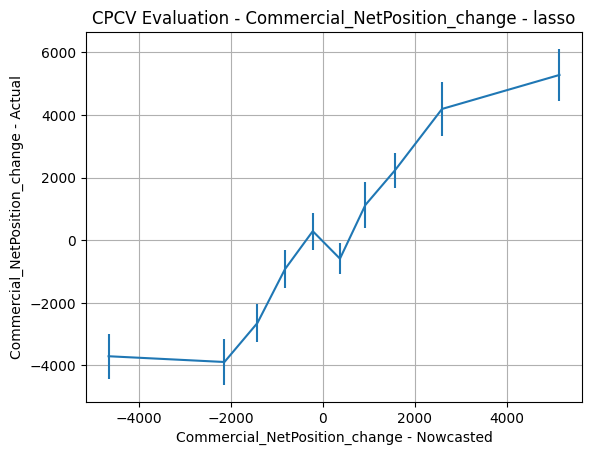

ridge: score=0.3802, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


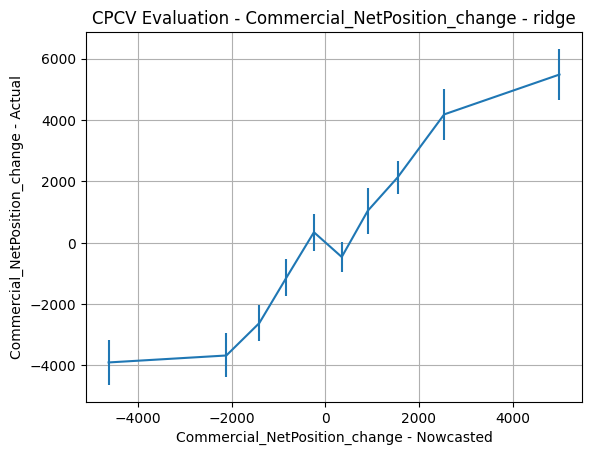

rf: score=0.4691, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}


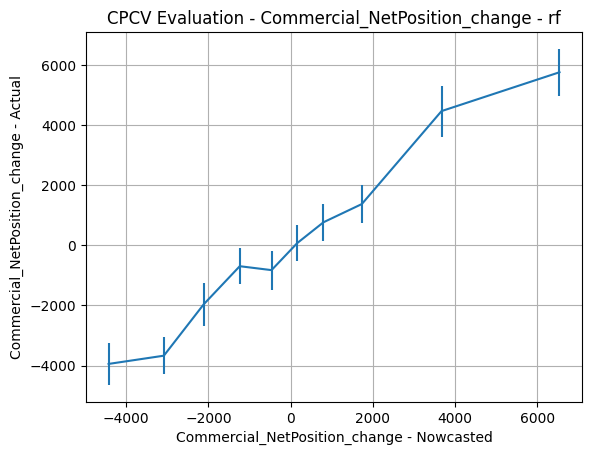

hgbm: score=0.4333, params={'model': 'hgbm', 'learning_rate': 0.19253329442084044, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.8503915061513505, 'max_leaf_nodes': 119}
{'learning_rate': 0.19253329442084044, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.8503915061513505, 'max_leaf_nodes': 119}


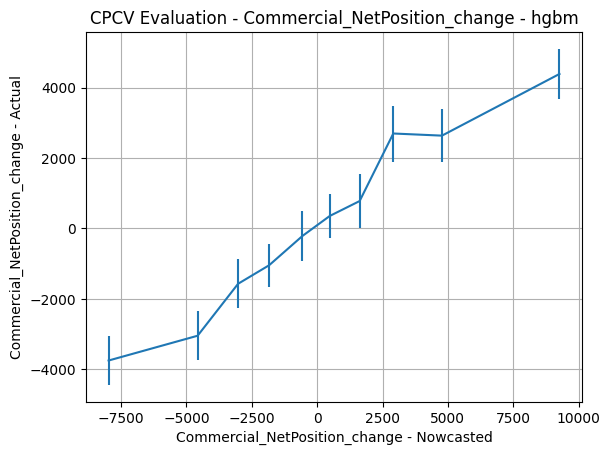

ols: score=0.3828, params={'model': 'ols'}
{}


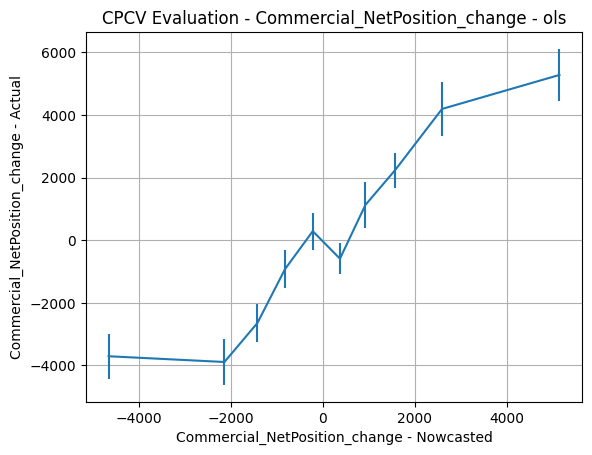

enet: score=0.3089, params={'model': 'enet', 'alpha': 8.148367709757886e-06, 'l1_ratio': 0.5801520803414412, 'loss': 'huber', 'epsilon': 0.14337254417753625}
{'alpha': 8.148367709757886e-06, 'l1_ratio': 0.5801520803414412, 'loss': 'huber', 'epsilon': 0.14337254417753625}


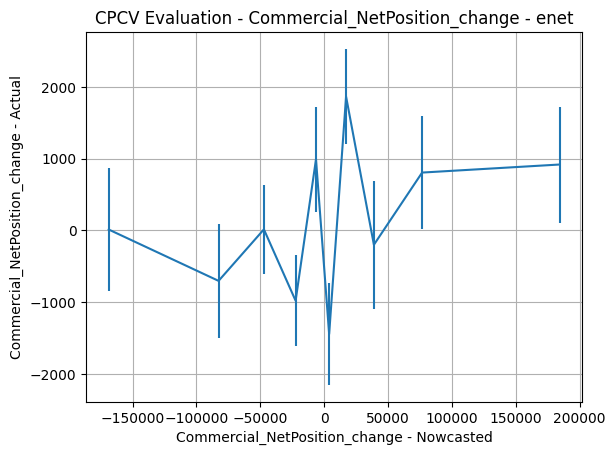

extra: score=0.4309, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


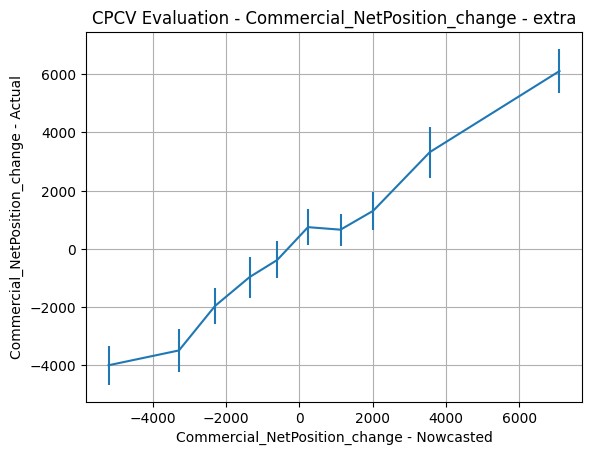

CommercialLongPosition_change
lasso: score=0.8034, params={'model': 'lasso', 'alpha': 6.853298554875743e-05}
{'alpha': 6.853298554875743e-05}


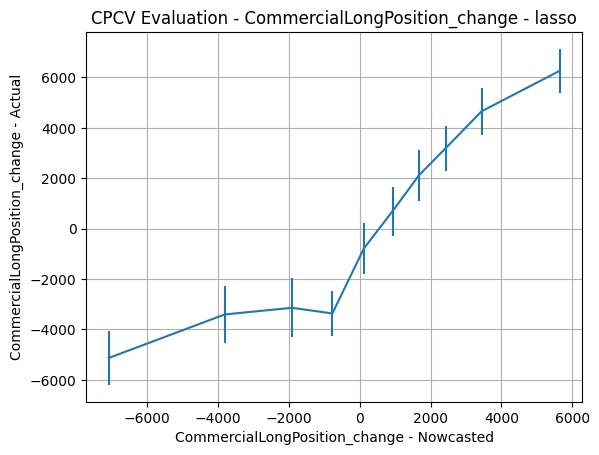

ridge: score=0.8034, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


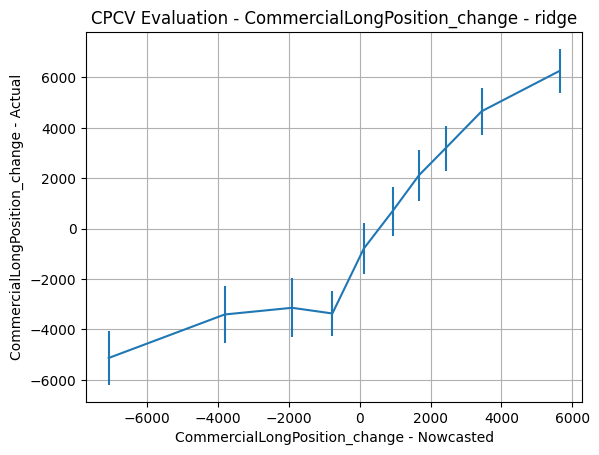

rf: score=0.7730, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


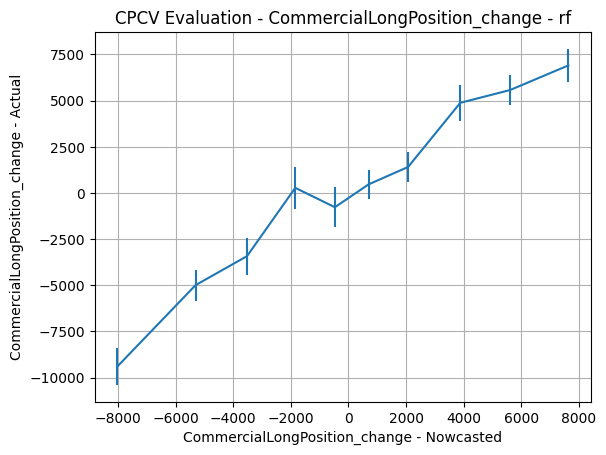

hgbm: score=0.7811, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


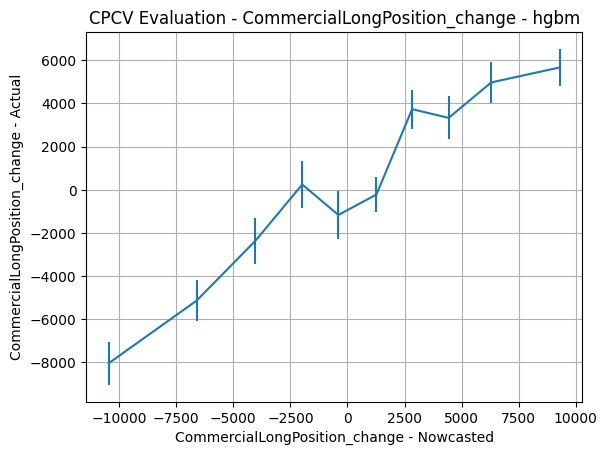

ols: score=0.8034, params={'model': 'ols'}
{}


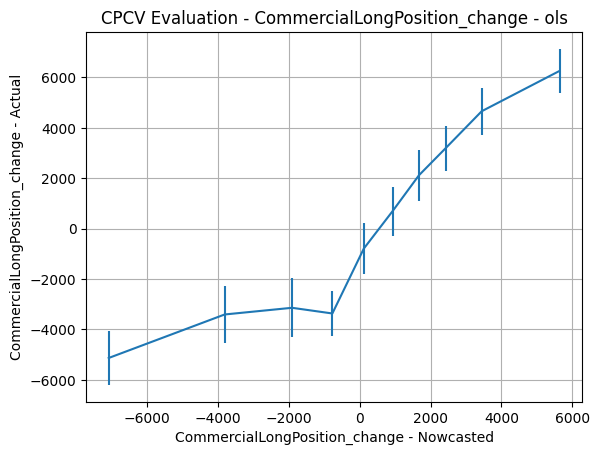

enet: score=0.7840, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


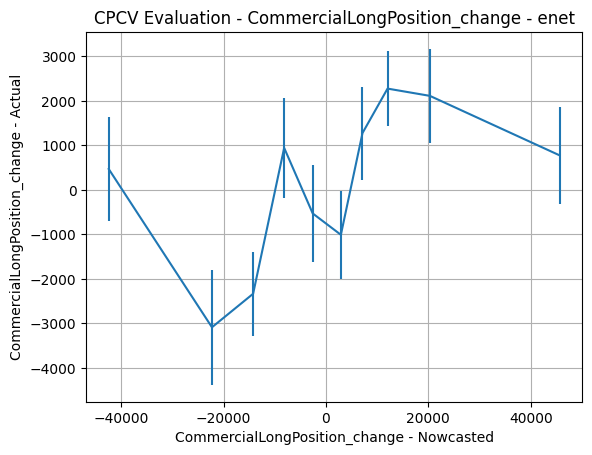

extra: score=0.7922, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


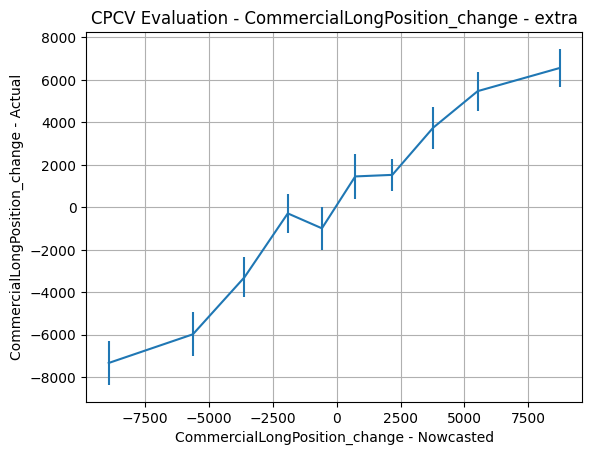

CommercialShortPosition_change
lasso: score=0.8433, params={'model': 'lasso', 'alpha': 0.015351249999486942}
{'alpha': 0.015351249999486942}


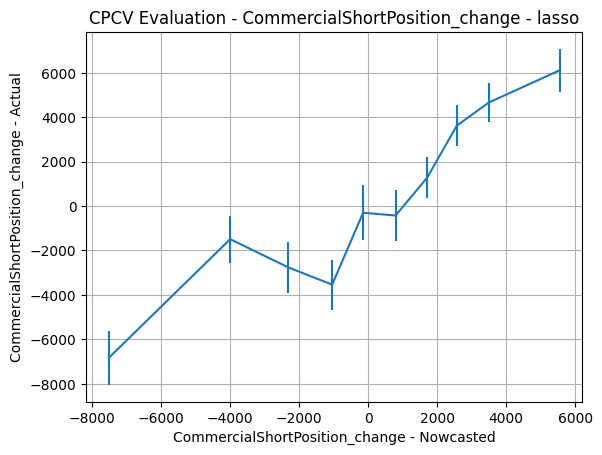

ridge: score=0.8377, params={'model': 'ridge', 'alpha': 926.5660759455584}
{'alpha': 926.5660759455584}


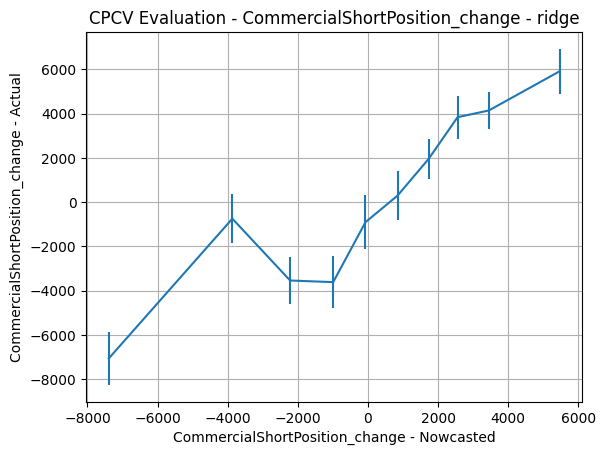

rf: score=0.7857, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


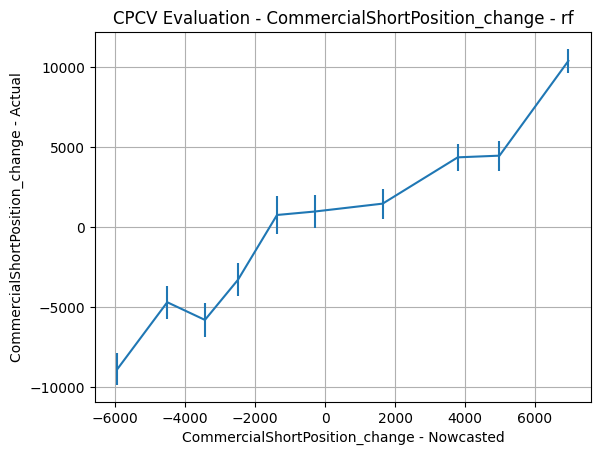

hgbm: score=0.7774, params={'model': 'hgbm', 'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}
{'learning_rate': 0.27502182519507296, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.596648595667206, 'max_leaf_nodes': 252}


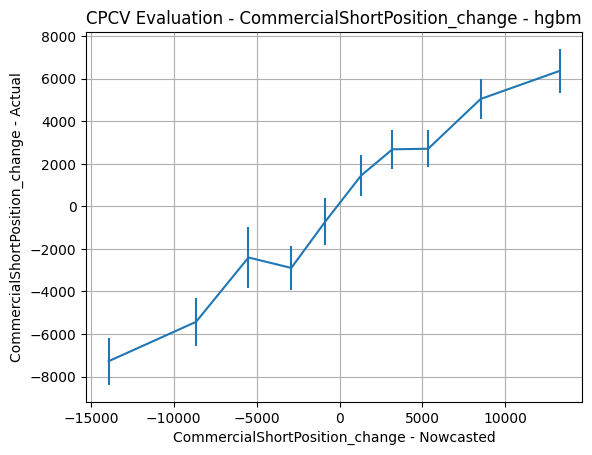

ols: score=0.8433, params={'model': 'ols'}
{}


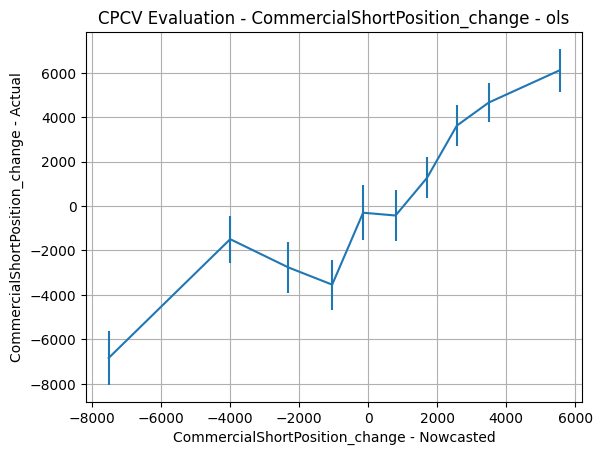

enet: score=0.8389, params={'model': 'enet', 'alpha': 0.06585073843573762, 'l1_ratio': 0.9438658020309548, 'loss': 'huber', 'epsilon': 0.19973882509898996}
{'alpha': 0.06585073843573762, 'l1_ratio': 0.9438658020309548, 'loss': 'huber', 'epsilon': 0.19973882509898996}


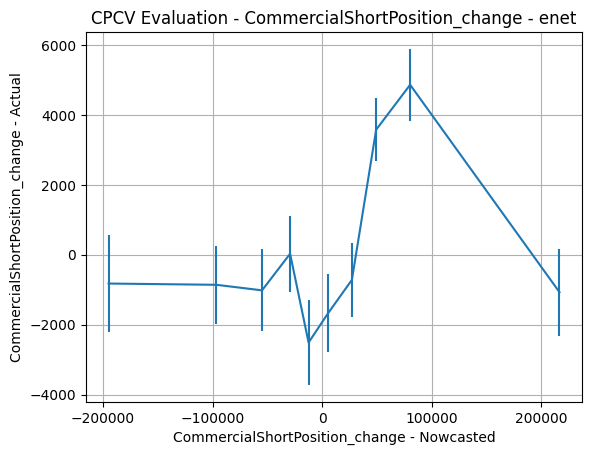

extra: score=0.8295, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


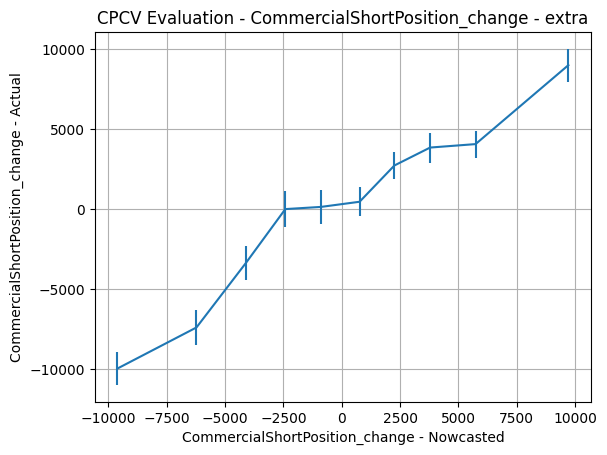

Commercial_NetPosition_to_openinterest_change
lasso: score=-0.0279, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


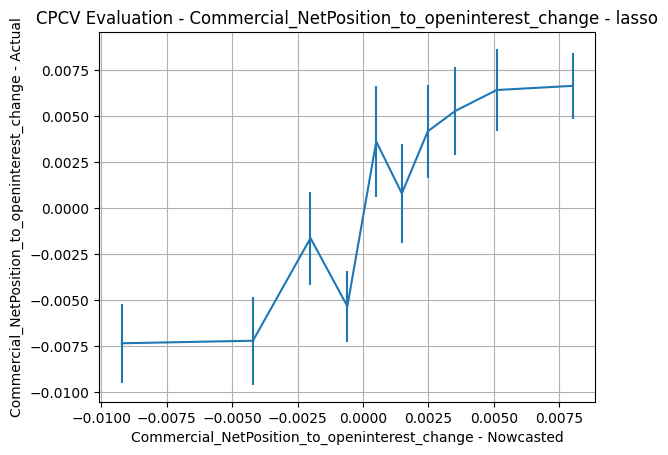

ridge: score=0.5026, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


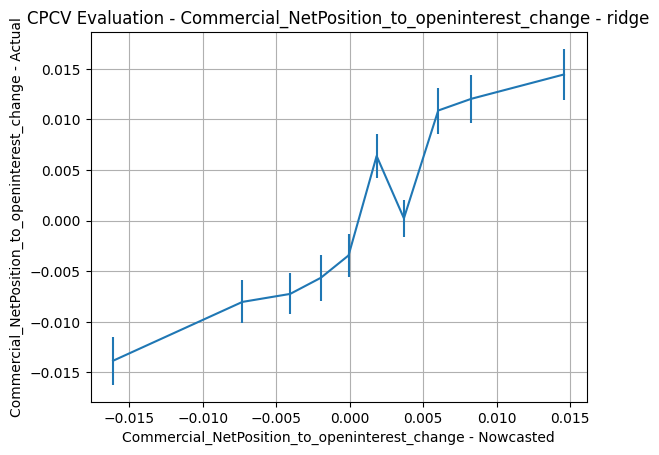

rf: score=0.5126, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}


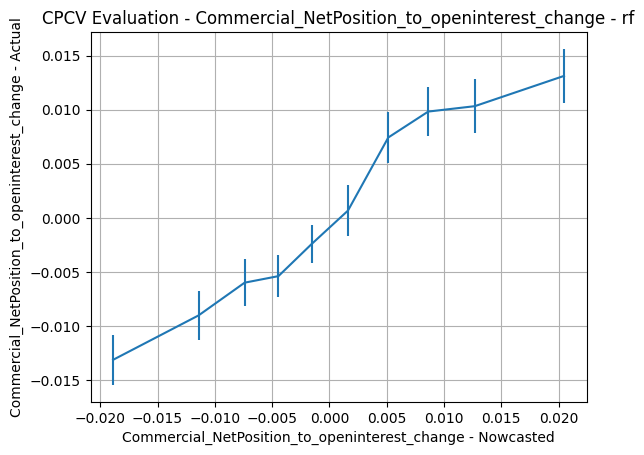

hgbm: score=0.5153, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
{'learning_rate': 0.0011976520841200263, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}


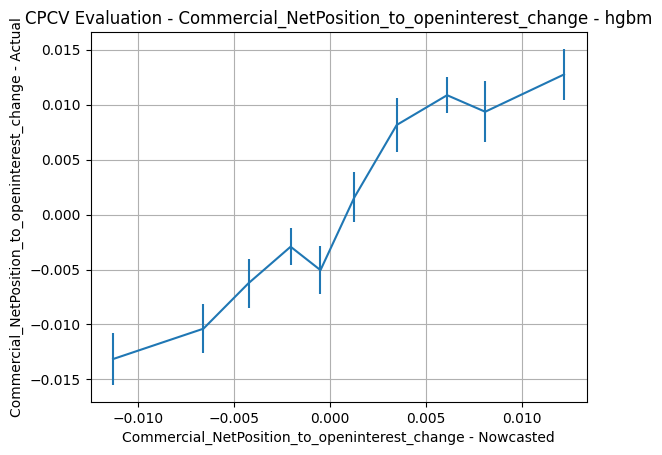

ols: score=0.5038, params={'model': 'ols'}
{}


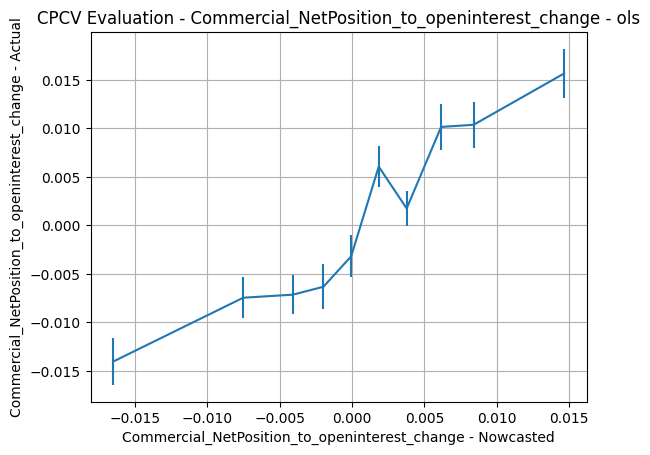

enet: score=0.4127, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


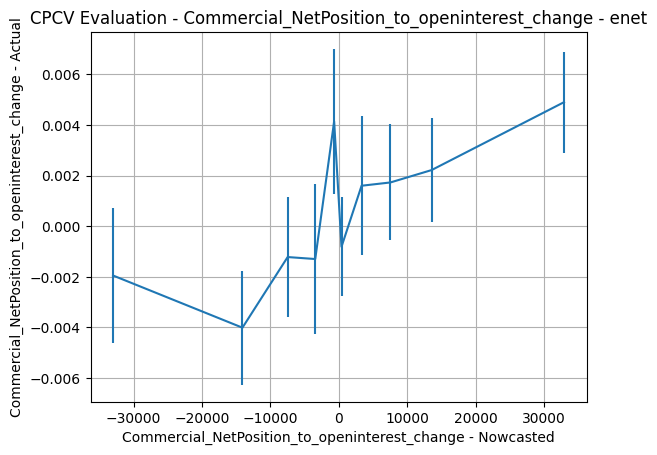

extra: score=0.5180, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}


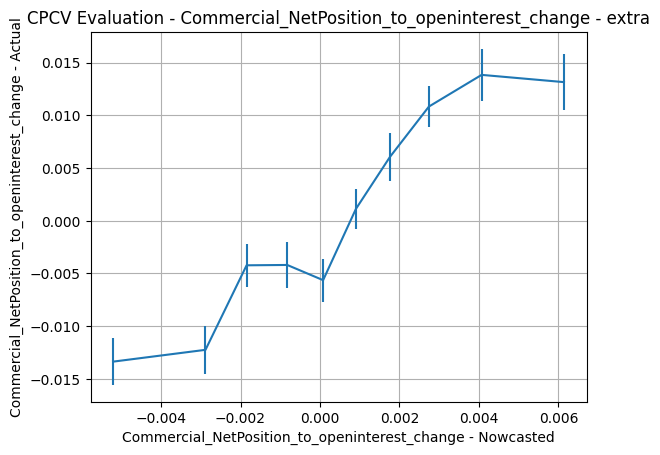

CommercialLongPosition_to_openinterest_change
lasso: score=-0.0129, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


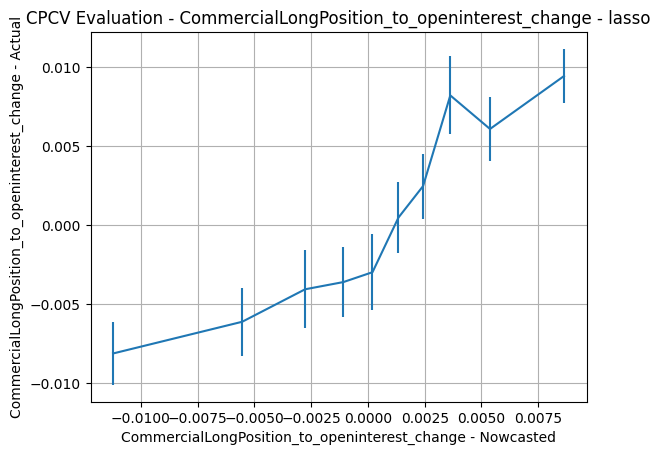

ridge: score=0.5429, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


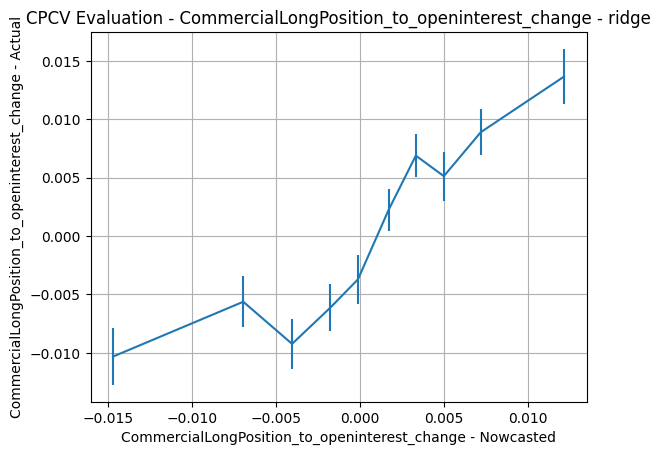

rf: score=0.5370, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


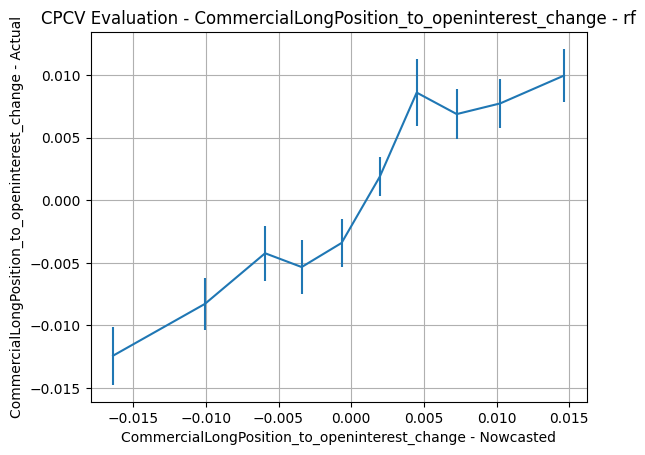

hgbm: score=0.4450, params={'model': 'hgbm', 'learning_rate': 0.21274218834412215, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}
{'learning_rate': 0.21274218834412215, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}


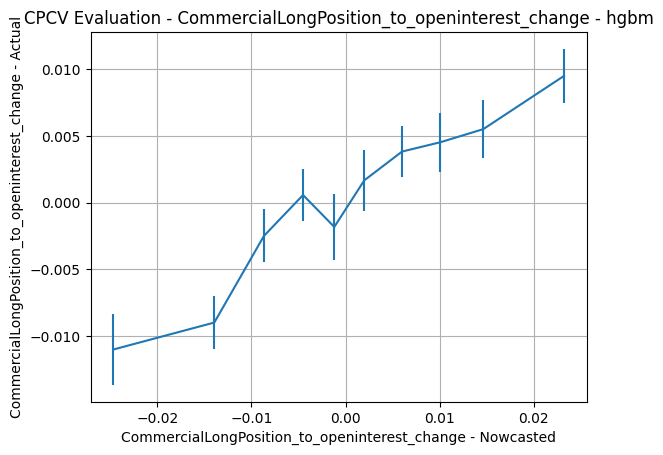

ols: score=0.5429, params={'model': 'ols'}
{}


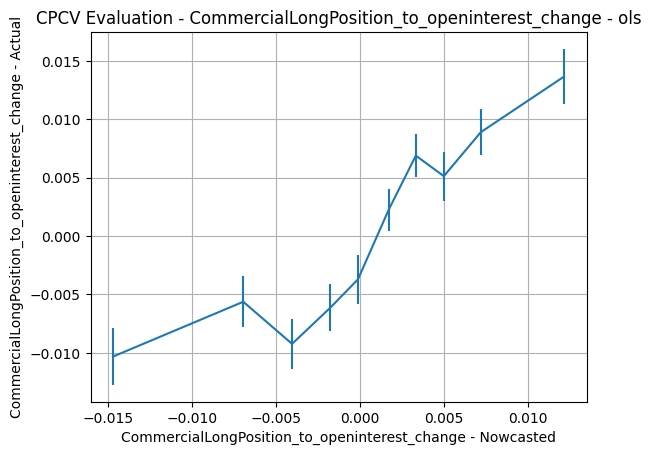

enet: score=-0.0104, params={'model': 'enet', 'alpha': 0.03756854400995655, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}
{'alpha': 0.03756854400995655, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}


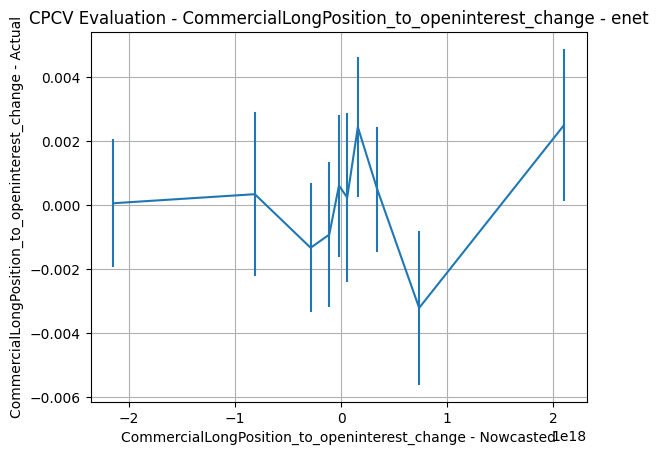

extra: score=0.5247, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


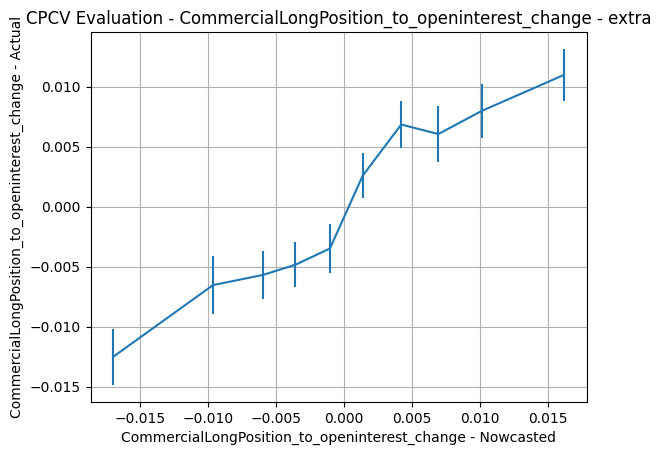

CommercialShortPosition_to_openinterest_change
lasso: score=-0.0609, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


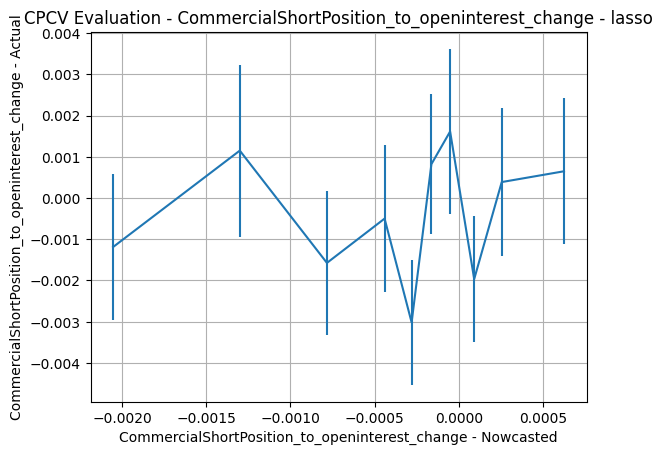

ridge: score=0.0978, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


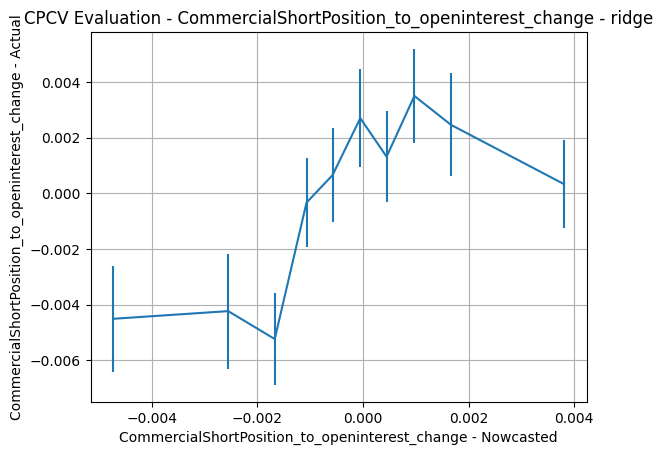

rf: score=0.1536, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


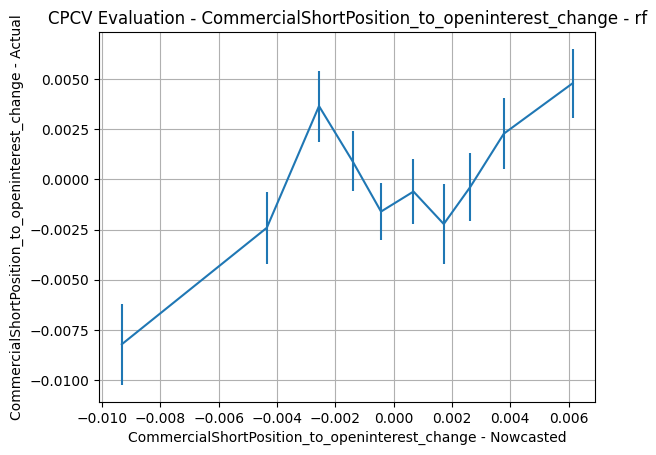

hgbm: score=0.1305, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


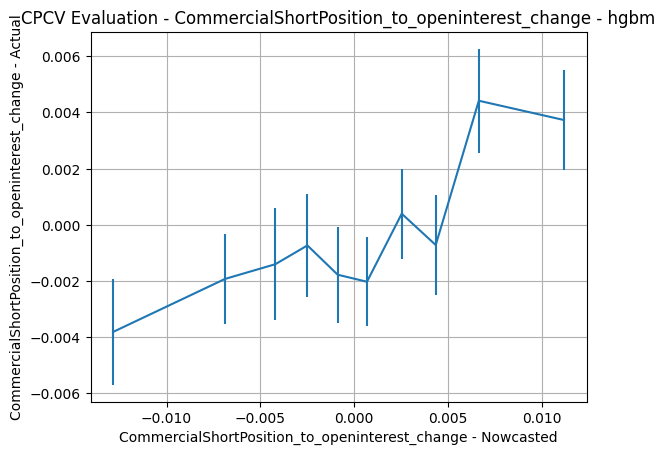

ols: score=0.1020, params={'model': 'ols'}
{}


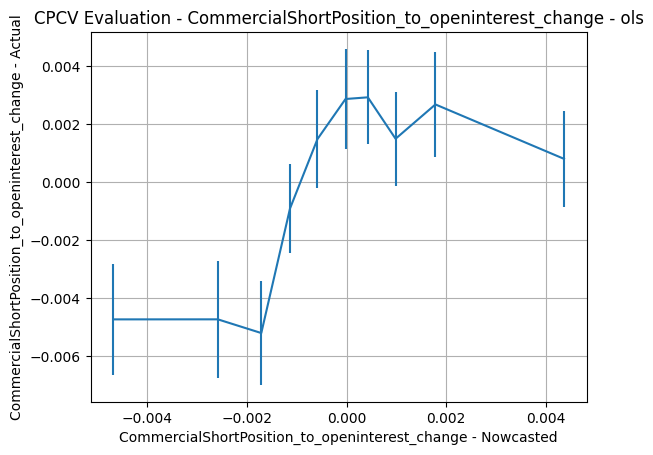

enet: score=-0.0491, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


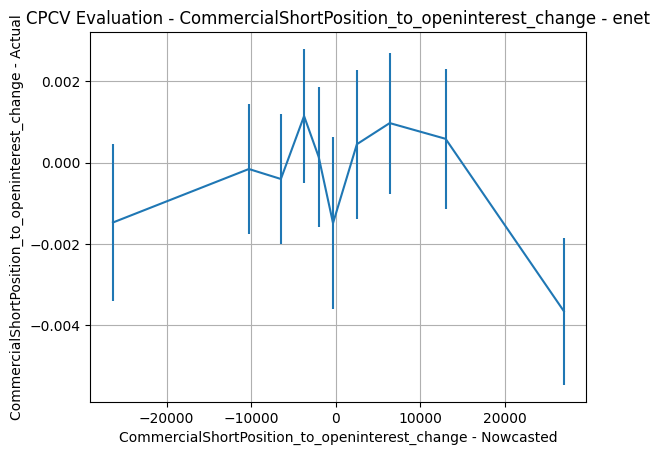

extra: score=0.1095, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


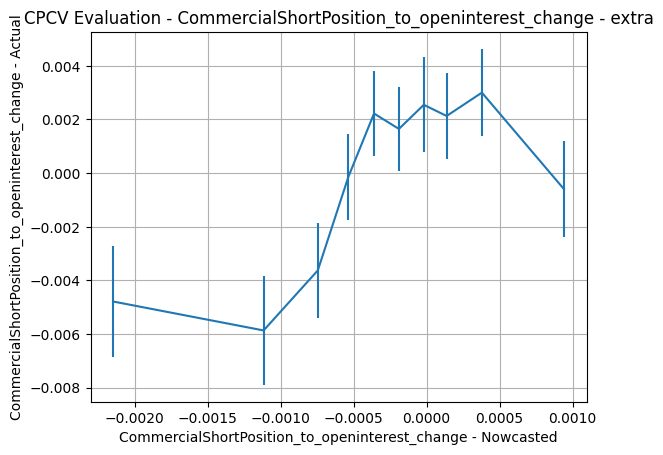

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
Commercial_NetPosition_change,0.354587,0.356908,0.440132,0.363136,0.354587,0.077921,0.417458
CommercialLongPosition_change,0.347092,0.347092,0.491260,0.436272,0.347092,0.089539,0.453909
CommercialShortPosition_change,0.328680,0.331368,0.512544,0.417782,0.328680,0.050659,0.517498
Commercial_NetPosition_to_openinterest_change,0.196661,0.348736,0.384304,0.399424,0.349033,0.077055,0.421834
CommercialLongPosition_to_openinterest_change,0.254391,0.327784,0.363564,0.297562,0.327784,0.035273,0.345502
CommercialShortPosition_to_openinterest_change,0.006647,0.102464,0.154631,0.130504,0.102039,-0.033563,0.115056


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

Commercial_NetPosition_change
{'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}
CommercialLongPosition_change
{'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
CommercialShortPosition_change
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Commercial_NetPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 8, 'max_features': 'log2'}
CommercialLongPosition_to_openinterest_change
{'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
CommercialShortPosition_to_openinterest_change
{'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


In [40]:
final_selected_model_and_parameters_per_response

{'Commercial_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 9,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'CommercialLongPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 12,
   'min_samples_leaf': 10,
   'max_features': 'sqrt'}},
 'CommercialShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 29,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'Commercial_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1000,
   'max_depth': 8,
   'min_samples_leaf': 8,
   'max_features': 'log2'}},
 'CommercialLongPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 400,
   'max_depth': 30,
   'min_samples_leaf': 3,
   'max_features': 'sqrt'}},
 'CommercialShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 400,
   'max_depth': 18,
   'min_sampl

In [41]:
import json
with open("rbob_cot_comm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)